In [1]:
from __future__ import print_function
import os
import sys

import numpy as np
import pandas as pd
from pandas import Series
import datetime
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

from keras.layers import Dense,Input, Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras import optimizers
import keras.backend as K


from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import matplotlib.pyplot as plt
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from random import randrange

from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are differen

In [2]:
from datetime import datetime
datetime.now().strftime('%m-%d %H:%M')

'12-26 10:21'

In [4]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Sources_and_Preparation')

In [5]:
Scaler_Type_Options = ['Normalizer', 'MinMaxScaler','MaxAbsScaler','RobustScaler','StandardScaler' ]
#Scaler_Type_Options = ['Normalizer', 'MinMaxScaler' ]

Product_Type_Options = [841810,841840,841850]
Product=Product_Type_Options[2]
ScalerType=Scaler_Type_Options[2]
print(Product,ScalerType)

MonthSeries="12"
MonthSeries_option=["1","12"]
#MonthSeries_option=["12","123","1236","1236_12","__12","__126","__1263","__12632"]
#MonthSeries_option=["12","123","1236","1236_12","__12"]
#X1hat.iloc[3:,:]


841850 MaxAbsScaler


In [5]:
def setpartner(Product):
    if Product==841810 :
        IMP1="USA"
        IMP2="JPN"
        IMP3="FRA"
        IMP4="AUS"
        EXP1="POL"
        EXP2="KOR"
        EXP3="ITA"
    elif Product==841840 :
        IMP1="USA"
        IMP2="JPN"
        IMP3="FRA"
        IMP4="DEU"
        EXP1="DEU"
        EXP2="NLD"
        EXP3="HUN"
    elif Product==841850 :
        IMP1="USA"
        IMP2="AUS"
        IMP3="ITA"
        IMP4="IDN"
        EXP1="AUT"
        EXP2="CHZ"
        EXP3="ITA"
    
    return IMP1,IMP2,IMP3,IMP4,EXP1,EXP2,EXP3

In [6]:
def readexcel(Product):
    if Product==841810 :
        Data_Core = pd.ExcelFile('Out_841810_CHN_UK_Data_Core_1236_12.xlsx')
        Data_Core = Data_Core.parse('Sheet1', header=0,index_col=None, na_values=['NA'])
    elif Product==841840:
        Data_Core = pd.ExcelFile('Out_841840_CHN_UK_Data_Core_1236_12.xlsx')
        Data_Core = Data_Core.parse('Sheet1', header=0,index_col=None, na_values=['NA'])
    elif Product==841850:
        Data_Core = pd.ExcelFile('Out_841850_CHN_UK_Data_Core_1236_12.xlsx')
        Data_Core = Data_Core.parse('Sheet1', header=0,index_col=None, na_values=['NA'])
    return Data_Core

In [7]:
def readexcel_hat(Product):
    if Product==841810 :
        Data_Core = pd.ExcelFile('Out_841810_CHN_UK_Data_Core_1236_12.xlsx')
        Data_Core = Data_Core.parse('Sheet2', header=0,index_col=None, na_values=['NA'])
    elif Product==841840:
        Data_Core = pd.ExcelFile('Out_841840_CHN_UK_Data_Core_1236_12.xlsx')
        Data_Core = Data_Core.parse('Sheet2', header=0,index_col=None, na_values=['NA'])
    elif Product==841850:
        Data_Core = pd.ExcelFile('Out_841850_CHN_UK_Data_Core_1236_12.xlsx')
        Data_Core = Data_Core.parse('Sheet2', header=0,index_col=None, na_values=['NA'])
    Data_Core=Data_Core.iloc[3:,:]
    return Data_Core


In [8]:
def set_X(Product,Data_Core,Dimension):
    if Dimension=="1":
        X=Data_Core[
    
            ['CHN_GBR_{}'.format(Product),'CHN_GBR_{}-1REAL'.format(Product),
               'CHN_World_{}-1'.format(Product), 'CHN_{}_{}-1'.format(IMP1,Product), 'CHN_{}_{}-1'.format(IMP2,Product),
               'CHN_{}_{}-1'.format(IMP3,Product), 'CHN_{}_{}-1'.format(IMP4,Product), 'CHN_GBR_{}-1'.format(Product),
               '{}_GBR_{}-1'. format(EXP1,Product), '{}_GBR_{}-1'. format(EXP2,Product), '{}_GBR_{}-1'. format(EXP3,Product), 
               'EPU_CHN-1','EPU_UK-1', 'EPU_World-1', 
               'BCI_CHN-1', 'CCI_CHN-1', 'CLI_CHN-1','GDP_CHN-1', 
               'BCI_GBR-1', 'CCI_GBR-1', 'CLI_GBR-1', 'GDP_GBR-1',
               'PPI_CHN-1', 'PPI_GBR-1', 'CPI_CHN-1', 'CPI_GBR-1', 
               'CNY-1', 'GBP-1','World-1',
               'Date','Year','Month']

#             'CNY-1', 'GBP-1','World-1','Date','Year','Month']
        ]
                

    elif Dimension=="12":
        X=Data_Core[ 
    
            ['CHN_GBR_{}'.format(Product),'CHN_GBR_{}-1REAL'.format(Product),
               'CHN_World_{}-1'. format(Product), 'CHN_{}_{}-1'.format(IMP1,Product),'CHN_{}_{}-1'.format(IMP2,Product), 
               'CHN_{}_{}-1'.format(IMP3,Product), 'CHN_{}_{}-1'.format(IMP4,Product),'CHN_GBR_{}-1'. format(Product), 
       
                'CHN_World_{}-2'. format(Product), 'CHN_{}_{}-2'.format(IMP1,Product),'CHN_{}_{}-2'.format(IMP2,Product), 
                'CHN_{}_{}-2'.format(IMP3,Product), 'CHN_{}_{}-2'.format(IMP4,Product),'CHN_GBR_{}-2'. format(Product), 
        
                '{}_GBR_{}-1'. format(EXP1,Product), '{}_GBR_{}-1'. format(EXP2,Product),'{}_GBR_{}-1'. format(EXP3,Product),
                '{}_GBR_{}-2'. format(EXP1,Product), '{}_GBR_{}-2'. format(EXP2,Product),'{}_GBR_{}-2'. format(EXP3,Product), 
        
                'EPU_CHN-1', 'EPU_CHN-2', 'EPU_UK-1', 'EPU_UK-2','EPU_World-1', 'EPU_World-2', 
                'BCI_CHN-1', 'CCI_CHN-1', 'CLI_CHN-1','GDP_CHN-1', 
                'BCI_CHN-2', 'CCI_CHN-2', 'CLI_CHN-2', 'GDP_CHN-2',
                'BCI_GBR-1', 'CCI_GBR-1', 'CLI_GBR-1', 'GDP_GBR-1', 
                'BCI_GBR-2','CCI_GBR-2', 'CLI_GBR-2', 'GDP_GBR-2', 
                'PPI_CHN-1', 'PPI_GBR-1','PPI_CHN-2', 'PPI_GBR-2', 
                'CPI_CHN-1', 'CPI_GBR-1', 'CPI_CHN-2','CPI_GBR-2', 
                'CNY-1', 'GBP-1', 'CNY-2', 'GBP-2', 
                'World-1', 'World-2',
               'Date','Year','Month']
    
            ]

    elif Dimension=="123":
        X=Data_Core[ 
            ['CHN_GBR_{}'.format(Product), 'CHN_GBR_{}-1REAL'.format(Product),
             'CHN_World_{}-1'. format(Product), 'CHN_{}_{}-1'.format(IMP1,Product),
               'CHN_{}_{}-1'.format(IMP2,Product), 'CHN_{}_{}-1'.format(IMP3,Product), 'CHN_{}_{}-1'.format(IMP4,Product),
               'CHN_GBR_{}-1'. format(Product), 'CHN_World_{}-2'. format(Product), 'CHN_{}_{}-2'.format(IMP1,Product),
               'CHN_{}_{}-2'.format(IMP2,Product), 'CHN_{}_{}-2'.format(IMP3,Product), 'CHN_{}_{}-2'.format(IMP4,Product),
               'CHN_GBR_{}-2'. format(Product), 'CHN_World_{}-3'. format(Product), 'CHN_{}_{}-3'.format(IMP1,Product),
               'CHN_{}_{}-3'.format(IMP2,Product), 'CHN_{}_{}-3'.format(IMP3,Product), 'CHN_{}_{}-3'.format(IMP4,Product),
               'CHN_GBR_{}-3'. format(Product), '{}_GBR_{}-1'. format(EXP1,Product), '{}_GBR_{}-1'. format(EXP2,Product),
               '{}_GBR_{}-1'. format(EXP3,Product), '{}_GBR_{}-2'. format(EXP1,Product), '{}_GBR_{}-2'. format(EXP2,Product),
               '{}_GBR_{}-2'. format(EXP3,Product), '{}_GBR_{}-3'. format(EXP1,Product), '{}_GBR_{}-3'. format(EXP2,Product),
               '{}_GBR_{}-3'. format(EXP3,Product), 'EPU_CHN-1', 'EPU_CHN-2', 'EPU_CHN-3', 'EPU_UK-1',
               'EPU_UK-2', 'EPU_UK-3', 'EPU_World-1', 'EPU_World-2', 'EPU_World-3',
               'BCI_CHN-1', 'CCI_CHN-1', 'CLI_CHN-1', 'GDP_CHN-1', 'BCI_CHN-2',
               'CCI_CHN-2', 'CLI_CHN-2', 'GDP_CHN-2', 'BCI_CHN-3', 'CCI_CHN-3',
               'CLI_CHN-3', 'GDP_CHN-3', 'BCI_GBR-1', 'CCI_GBR-1', 'CLI_GBR-1',
               'GDP_GBR-1', 'BCI_GBR-2', 'CCI_GBR-2', 'CLI_GBR-2', 'GDP_GBR-2',
               'BCI_GBR-3', 'CCI_GBR-3', 'CLI_GBR-3', 'GDP_GBR-3', 'PPI_CHN-1',
               'PPI_GBR-1', 'PPI_CHN-2', 'PPI_GBR-2', 'PPI_CHN-3', 'PPI_GBR-3',
               'CPI_CHN-1', 'CPI_GBR-1', 'CPI_CHN-2', 'CPI_GBR-2', 'CPI_CHN-3',
               'CPI_GBR-3', 'CNY-1', 'GBP-1', 'CNY-2', 'GBP-2', 'CNY-3', 'GBP-3',
               'World-1', 'World-2', 'World-3',  
                'Date','Year','Month']

             ]
    elif Dimension=="1236":
        X=Data_Core[ 

            ['CHN_GBR_{}'.format(Product),'CHN_GBR_{}-1REAL'.format(Product),
             'CHN_World_{}-1'. format(Product), 'CHN_{}_{}-1'.format(IMP1,Product),
               'CHN_{}_{}-1'.format(IMP2,Product), 'CHN_{}_{}-1'.format(IMP3,Product), 'CHN_{}_{}-1'.format(IMP4,Product),
               'CHN_GBR_{}-1'. format(Product), 'CHN_World_{}-2'. format(Product), 'CHN_{}_{}-2'.format(IMP1,Product),
               'CHN_{}_{}-2'.format(IMP2,Product), 'CHN_{}_{}-2'.format(IMP3,Product), 'CHN_{}_{}-2'.format(IMP4,Product),
               'CHN_GBR_{}-2'. format(Product), 'CHN_World_{}-3'. format(Product), 'CHN_{}_{}-3'.format(IMP1,Product),
               'CHN_{}_{}-3'.format(IMP2,Product), 'CHN_{}_{}-3'.format(IMP3,Product), 'CHN_{}_{}-3'.format(IMP4,Product),
               'CHN_GBR_{}-3'. format(Product), '{}_GBR_{}-1'. format(EXP1,Product), '{}_GBR_{}-1'. format(EXP2,Product),
               '{}_GBR_{}-1'. format(EXP3,Product), '{}_GBR_{}-2'. format(EXP1,Product), '{}_GBR_{}-2'. format(EXP2,Product),
               '{}_GBR_{}-2'. format(EXP3,Product), '{}_GBR_{}-3'. format(EXP1,Product), '{}_GBR_{}-3'. format(EXP2,Product),
               '{}_GBR_{}-3'. format(EXP3,Product), 'EPU_CHN-1', 'EPU_CHN-2', 'EPU_CHN-3', 'EPU_UK-1',
               'EPU_UK-2', 'EPU_UK-3', 'EPU_World-1', 'EPU_World-2', 'EPU_World-3',
               'BCI_CHN-1', 'CCI_CHN-1', 'CLI_CHN-1', 'GDP_CHN-1', 'BCI_CHN-2',
               'CCI_CHN-2', 'CLI_CHN-2', 'GDP_CHN-2', 'BCI_CHN-3', 'CCI_CHN-3',
               'CLI_CHN-3', 'GDP_CHN-3', 'BCI_GBR-1', 'CCI_GBR-1', 'CLI_GBR-1',
               'GDP_GBR-1', 'BCI_GBR-2', 'CCI_GBR-2', 'CLI_GBR-2', 'GDP_GBR-2',
               'BCI_GBR-3', 'CCI_GBR-3', 'CLI_GBR-3', 'GDP_GBR-3', 'PPI_CHN-1',
               'PPI_GBR-1', 'PPI_CHN-2', 'PPI_GBR-2', 'PPI_CHN-3', 'PPI_GBR-3',
               'CPI_CHN-1', 'CPI_GBR-1', 'CPI_CHN-2', 'CPI_GBR-2', 'CPI_CHN-3',
               'CPI_GBR-3', 'CNY-1', 'GBP-1', 'CNY-2', 'GBP-2', 'CNY-3', 'GBP-3',
               'World-1', 'World-2', 'World-3',

               'CHN_World_{}-6'. format(Product), 'CHN_{}_{}-6'.format(IMP1,Product), 'CHN_{}_{}-6'.format(IMP2,Product),
               'CHN_{}_{}-6'.format(IMP3,Product), 'CHN_{}_{}-6'.format(IMP4,Product), 'CHN_GBR_{}-6'. format(Product),
               '{}_GBR_{}-6'. format(EXP1,Product), '{}_GBR_{}-6'. format(EXP2,Product), '{}_GBR_{}-6'. format(EXP3,Product), 
               'EPU_CHN-6','EPU_UK-6', 'EPU_World-6', 
               'BCI_CHN-6', 'CCI_CHN-6', 'CLI_CHN-6','GDP_CHN-6', 
               'BCI_GBR-6', 'CCI_GBR-6', 'CLI_GBR-6', 'GDP_GBR-6',
               'PPI_CHN-6', 'PPI_GBR-6', 'CPI_CHN-6', 'CPI_GBR-6', 
               'CNY-6', 'GBP-6','World-6',
                'Date','Year','Month']

             ]
    elif Dimension=="1236_12":
        X=Data_Core[ 

            ['CHN_GBR_{}'.format(Product),'CHN_GBR_{}-1REAL'.format(Product),
             'CHN_World_{}-1'. format(Product), 'CHN_{}_{}-1'.format(IMP1,Product),
               'CHN_{}_{}-1'.format(IMP2,Product), 'CHN_{}_{}-1'.format(IMP3,Product), 'CHN_{}_{}-1'.format(IMP4,Product),
               'CHN_GBR_{}-1'. format(Product), 'CHN_World_{}-2'. format(Product), 'CHN_{}_{}-2'.format(IMP1,Product),
               'CHN_{}_{}-2'.format(IMP2,Product), 'CHN_{}_{}-2'.format(IMP3,Product), 'CHN_{}_{}-2'.format(IMP4,Product),
               'CHN_GBR_{}-2'. format(Product), 'CHN_World_{}-3'. format(Product), 'CHN_{}_{}-3'.format(IMP1,Product),
               'CHN_{}_{}-3'.format(IMP2,Product), 'CHN_{}_{}-3'.format(IMP3,Product), 'CHN_{}_{}-3'.format(IMP4,Product),
               'CHN_GBR_{}-3'. format(Product), '{}_GBR_{}-1'. format(EXP1,Product), '{}_GBR_{}-1'. format(EXP2,Product),
               '{}_GBR_{}-1'. format(EXP3,Product), '{}_GBR_{}-2'. format(EXP1,Product), '{}_GBR_{}-2'. format(EXP2,Product),
               '{}_GBR_{}-2'. format(EXP3,Product), '{}_GBR_{}-3'. format(EXP1,Product), '{}_GBR_{}-3'. format(EXP2,Product),
               '{}_GBR_{}-3'. format(EXP3,Product), 'EPU_CHN-1', 'EPU_CHN-2', 'EPU_CHN-3', 'EPU_UK-1',
               'EPU_UK-2', 'EPU_UK-3', 'EPU_World-1', 'EPU_World-2', 'EPU_World-3',
               'BCI_CHN-1', 'CCI_CHN-1', 'CLI_CHN-1', 'GDP_CHN-1', 'BCI_CHN-2',
               'CCI_CHN-2', 'CLI_CHN-2', 'GDP_CHN-2', 'BCI_CHN-3', 'CCI_CHN-3',
               'CLI_CHN-3', 'GDP_CHN-3', 'BCI_GBR-1', 'CCI_GBR-1', 'CLI_GBR-1',
               'GDP_GBR-1', 'BCI_GBR-2', 'CCI_GBR-2', 'CLI_GBR-2', 'GDP_GBR-2',
               'BCI_GBR-3', 'CCI_GBR-3', 'CLI_GBR-3', 'GDP_GBR-3', 'PPI_CHN-1',
               'PPI_GBR-1', 'PPI_CHN-2', 'PPI_GBR-2', 'PPI_CHN-3', 'PPI_GBR-3',
               'CPI_CHN-1', 'CPI_GBR-1', 'CPI_CHN-2', 'CPI_GBR-2', 'CPI_CHN-3',
               'CPI_GBR-3', 'CNY-1', 'GBP-1', 'CNY-2', 'GBP-2', 'CNY-3', 'GBP-3',
               'World-1', 'World-2', 'World-3',

               'CHN_World_{}-6'. format(Product), 'CHN_{}_{}-6'.format(IMP1,Product), 'CHN_{}_{}-6'.format(IMP2,Product),
               'CHN_{}_{}-6'.format(IMP3,Product), 'CHN_{}_{}-6'.format(IMP4,Product), 'CHN_GBR_{}-6'. format(Product),   
               '{}_GBR_{}-6'. format(EXP1,Product), '{}_GBR_{}-6'. format(EXP2,Product), '{}_GBR_{}-6'. format(EXP3,Product), 
               'EPU_CHN-6','EPU_UK-6', 'EPU_World-6', 
               'BCI_CHN-6', 'CCI_CHN-6', 'CLI_CHN-6','GDP_CHN-6', 
               'BCI_GBR-6', 'CCI_GBR-6', 'CLI_GBR-6', 'GDP_GBR-6',
               'PPI_CHN-6', 'PPI_GBR-6', 'CPI_CHN-6', 'CPI_GBR-6', 
               'CNY-6', 'GBP-6','World-6',
    
               'CHN_World_{}-12'. format(Product), 'CHN_{}_{}-12'.format(IMP1,Product), 'CHN_{}_{}-12'.format(IMP2,Product),
               'CHN_{}_{}-12'.format(IMP3,Product), 'CHN_{}_{}-12'.format(IMP4,Product), 'CHN_GBR_{}-12'. format(Product),       
               '{}_GBR_{}-12'. format(EXP1,Product), '{}_GBR_{}-12'. format(EXP2,Product), '{}_GBR_{}-12'. format(EXP3,Product), 
               'EPU_CHN-12','EPU_UK-12', 'EPU_World-12', 
               'BCI_CHN-12', 'CCI_CHN-12', 'CLI_CHN-12','GDP_CHN-12', 
               'BCI_GBR-12', 'CCI_GBR-12', 'CLI_GBR-12', 'GDP_GBR-12',
               'PPI_CHN-12', 'PPI_GBR-12', 'CPI_CHN-12', 'CPI_GBR-12', 
               'CNY-12', 'GBP-12','World-12',
                'Date','Year','Month']
   
             ]

    X=X.dropna()    
    return X

In [9]:
MonthSeries="1" # veya "2"

for Product in Product_Type_Options:
    partner=setpartner(Product)
  
    IMP1=partner[0]
    IMP2=partner[1]
    IMP3=partner[2]
    IMP4=partner[3]
    EXP1=partner[4]
    EXP2=partner[5]
    EXP3=partner[6]
    
    Data_Core=readexcel(Product)
    Data_Core_hat=readexcel_hat(Product)
#    Z=set_z(Product,Data_Core)
    print(Product)
    if Product==841810 :
        X1=set_X(Product,Data_Core,MonthSeries)
        y1=X1['CHN_GBR_{}'.format(Product)]
        z1=X1[['Date','Year','Month']]
        X1=X1.drop(['CHN_GBR_{}'.format(Product),'CHN_GBR_{}-1REAL'.format(Product),'Date','Year','Month'], axis=1)

        X1hat=set_X(Product,Data_Core_hat,MonthSeries)
        y1hat=X1hat['CHN_GBR_{}'.format(Product)]
        z1hat=X1hat[['Date','Year','Month']]
        X1hat=X1hat.drop(['CHN_GBR_{}'.format(Product),'Date','Year','Month'], axis=1)

        print('X1',X1.shape, y1.shape,'X1hat', X1hat.shape, y1hat.shape)
        
    elif Product==841840 :

        X2=set_X(Product,Data_Core,MonthSeries)
        y2=X2['CHN_GBR_{}'.format(Product)]
        z2=X2[['Date','Year','Month']]
        X2=X2.drop(['CHN_GBR_{}'.format(Product),'CHN_GBR_{}-1REAL'.format(Product),'Date','Year','Month'], axis=1)

        X2hat=set_X(Product,Data_Core_hat,MonthSeries)
        y2hat=X2hat['CHN_GBR_{}'.format(Product)]
        z2hat=X2hat[['Date','Year','Month']]
        X2hat=X2hat.drop(['CHN_GBR_{}'.format(Product),'Date','Year','Month'], axis=1)

        print('X2',X2.shape, y2.shape,'X2hat', X2hat.shape, y2hat.shape)
    elif Product==841850 :
        X3=set_X(Product,Data_Core,MonthSeries)
        y3=X3['CHN_GBR_{}'.format(Product)]
        z3=X3[['Date','Year','Month']]
        X3=X3.drop(['CHN_GBR_{}'.format(Product),'CHN_GBR_{}-1REAL'.format(Product),'Date','Year','Month'], axis=1)

        X3hat=set_X(Product,Data_Core_hat,MonthSeries)
        y3hat=X3hat['CHN_GBR_{}'.format(Product)]
        z3hat=X3hat[['Date','Year','Month']]
        X3hat=X3hat.drop(['CHN_GBR_{}'.format(Product),'Date','Year','Month'], axis=1)

        print('X3',X3.shape, y3.shape,'X3hat', X3hat.shape, y3hat.shape)

841810
X1 (131, 27) (131,) X1hat (130, 28) (130,)
841840
X2 (131, 27) (131,) X2hat (130, 28) (130,)
841850
X3 (131, 27) (131,) X3hat (130, 28) (130,)


In [10]:
#X1.to_excel('X1.xlsx',index = False)

In [11]:
def TrainTestSplit(rs,X,y,date,th,random_split):
    split_succesfull='TRUE'
    values = X.values
    values = values.astype('float32')
    scaler_x= MinMaxScaler(feature_range=(0, 1))

    scaled_value_x = scaler_x.fit_transform(values)
    scaled_value_x = pd.DataFrame(data=scaled_value_x[:,:])

    values = y.values
    values = values.astype('float32')
    scaler_y= MinMaxScaler(feature_range=(0, 1))

    scaled_value_y = scaler_y.fit_transform(values)
    scaled_value_y = pd.DataFrame(data=scaled_value_y)

    if random_split =='TRUE':
        train_X, test_X, train_y, test_y = train_test_split(scaled_value_x.values,scaled_value_y.values,
                                                        test_size=0.2,random_state=rs, 
                                                        stratify=date['Month']
                                                       )

        

    elif random_split =='FALSE':
        train_lenght=int(len(X)*0.8)
        test_lenght=len(X)-train_lenght
        
        train_X=scaled_value_x.iloc[0:train_lenght,:].values
        test_X=scaled_value_x.iloc[train_lenght:len(X),:].values 
        
        train_y=scaled_value_y.iloc[0:train_lenght].values 
        test_y=scaled_value_y.iloc[train_lenght:len(X)].values
        
#        train_y_Analiz= train_y
#        test_y_Analiz=test_y
  
    train_y_Analiz=pd.DataFrame(data=train_y[:,:])
    test_y_Analiz=pd.DataFrame(data=test_y[:,:])
    
#    Analiz(scaled_value_y)
#    Analiz(train_y_Analiz)
#    Analiz(test_y_Analiz)
    mean_scaled_y=scaled_value_y.describe().iloc[1].values
    mean_train_y=train_y_Analiz.describe().iloc[1].values
    mean_test_y=test_y_Analiz.describe().iloc[1].values
    
    perc=abs((mean_train_y-mean_scaled_y)/mean_scaled_y)*100
    
    if perc > th:
    
#        print('Split is not succesfull') 
        split_succesfull='FALSE'
    
#    print('mean=', mean_scaled_y,'mean_train_y=',mean_train_y, 'perc=', perc)
#    print('diffence=', (mean_train_y-mean_scaled_y))
    
#    print('mean=', scaled_value_y.describe().iloc[1])
    #print(scaled_value_y.describe()) #,train_y_Analiz.describe(),test_y_Analiz.describe()[1])
    
    #a.to_excel('Dagılım_Kontrolu_icin.xlsx',index = False)
    
    return train_X, test_X, train_y, test_y, scaler_x, scaler_y,scaled_value_y.describe(),split_succesfull

In [12]:
y=y3
X=X3
date=z3
repeats=1
rs=random.randint(1,100)
rs=42
print(rs)
#Threshold Setting for warning
th=2.5
random_split='FALSE'
SplitData=TrainTestSplit(rs,X,y,date,th,random_split)

for r in range(repeats):
    rs=random.randint(1,100)
    print(rs)
    SplitData=TrainTestSplit(rs,X,y,date,th,random_split)

    
#Feature Reduction için % oran %0 hepisini alıyor.    
#percentile=50
percentile=0

42
77


In [13]:
X.to_excel('X2Split.xlsx',index = False)

HIC AYAR YAPMADAN FARKLI SPLIT YAPARAK RF CALISMASI
Dort Farklı Calısma Yapıldı
1. Aylık Stratify olmadan her 3 urun kodu için çalıştırıldı
2. Aylık Stratify yapılarak her 3 ürün kodu için çalıştırıldı
3. Aylık Stratify yapılarak aylık fark verisi üzerinden (Xhat) her 3 ürün kodu için çalıştırıldı 
    R2 gercek değeri alındı.
4. Aylık Stratify yapılarak aylık fark verisi üzerinden (Xhat) her 3 ürün kodu için çalıştırıldı 
    R2 o ayın gerçek değerine göre ayarlanarak alındı.


In [40]:
repeats=3
random_range_for_split=50
rs=random.randint(1,100)
#rs=12
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

est=10000
min_leaf=5
feat="auto"
max_leaf=100
min_weight=0.00001
min_impurity=0.001

param='TRUE'

for r in range (random_range_for_split):

#for r in range(repeats):
    rs=random.randint(1,100)
#    rs=42
    print(rs)
    SplitData=TrainTestSplit(rs,X,y,date,th,random_split)

    
    train_X=SplitData[0] 
    test_X=SplitData[1] 
    train_y=SplitData[2] 
    test_y=SplitData[3]
    scaler_x=SplitData[4]
    scaler_y=SplitData[5]
    split_succesfull=SplitData[7]
    print(split_succesfull)

    experiment_result=experiment_RF(repeats,param,est,min_leaf,rs,
                                    feat,max_leaf,min_weight,min_impurity,
                                    train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
    
#Xhat için analiz yapıldığı ve Adjusted R2 hesaplandığı zaman [2] nolu output kullanılıyor 
#                                    train_X, test_X, train_y, test_y,scaler_x,scaler_y)[2]

    results[str(r)]= experiment_result
    results_exp[split_succesfull]= experiment_result
    results_split=pd.concat([results_split,results_exp])
    print ('results split',results_split)

results_randomnumber_bins=results
resultvalues=results.values
results_all=resultvalues.reshape((random_range_for_split*repeats,1))
results_all=pd.DataFrame(data=results_all[:,:])

#max_R2=results_all.describe().iloc[7,:]
#std=results_all.describe().iloc[2,:]
#mean=results_all.describe().iloc[1,:]

mean=results_all.describe().values[1]
std=results_all.describe().values[2]
max_R2=results_all.describe().values[7]

results_all.hist()
plt.title('{} and with split threshold {} for {} different run'.format(y.name,th,random_range_for_split))
plt.axis([0, 1, 0, 400])
plt.xlabel('mean {}, std {}, max_value{}'.format(mean,std,max_R2))
#plt.savefig('Distiribution_without_Tuning\Histogram Plot R2 for {} and with (non stratify) split threshold {} for {} different run.png'.format(y.name,th,random_range_for_split))
plt.savefig('Distiribution_without_Tuning\Histogram Plot R2 for {} and with (rs=random) split threshold {} and {} param for {} different run.png'.format(y.name,th,param,random_range_for_split))

pyplot.show()

plt.gcf().clear()
plt.title('{} and with split threshold {}'.format(y.name,th))

results_split.boxplot()
#plt.savefig('Distiribution_without_Tuning\Box Plot R2 for {} and with (non stratify) split threshold {} for {} different run.png'.format(y.name,th,random_range_for_split), format='png', dpi=300)
plt.savefig('Distiribution_without_Tuning\Box Plot R2 for {} and with (rs=random)split threshold {} for {} different run.png'.format(y.name,th,random_range_for_split), format='png', dpi=300)

pyplot.show()                                   

      




#sonuc=pd.concat([sonuc,calıstır_randomforest(X_train, X_test, y_train, y_test,scaler_y,Product,MonthSerie,ScalerType)])

#max_R2=int((sonuc['R2'].max())*1000)/1000
#filename='Out_Random_Predict_Results_{one}_Product{two}_{four}perc_with max{tre}'.format(one=datetime.now().strftime('Date_%m-%d_Time%H_%M'),
#                                                                                      two=Product,tre=max_R2,four=percentile)
#sonuc.to_excel('{}.xlsx'.format(filename),index = False)      
      



60
TRUE
results split     TRUE
0  0.707
1  0.711
2  0.710
17
TRUE
results split     TRUE
0  0.707
1  0.711
2  0.710
0  0.532
1  0.530
2  0.530
10
TRUE
results split     TRUE
0  0.707
1  0.711
2  0.710
0  0.532
1  0.530
2  0.530
0  0.488
1  0.488
2  0.488
74
TRUE
results split     TRUE
0  0.707
1  0.711
2  0.710
0  0.532
1  0.530
2  0.530
0  0.488
1  0.488
2  0.488
0  0.513
1  0.516
2  0.515
18
TRUE
results split     TRUE
0  0.707
1  0.711
2  0.710
0  0.532
1  0.530
2  0.530
0  0.488
1  0.488
2  0.488
0  0.513
1  0.516
2  0.515
0  0.521
1  0.523
2  0.520
2
TRUE
results split     TRUE
0  0.707
1  0.711
2  0.710
0  0.532
1  0.530
2  0.530
0  0.488
1  0.488
2  0.488
0  0.513
1  0.516
2  0.515
0  0.521
1  0.523
2  0.520
0  0.596
1  0.592
2  0.595
60
TRUE
results split     TRUE
0  0.707
1  0.711
2  0.710
0  0.532
1  0.530
2  0.530
0  0.488
1  0.488
2  0.488
0  0.513
1  0.516
2  0.515
0  0.521
1  0.523
2  0.520
0  0.596
1  0.592
2  0.595
0  0.710
1  0.710
2  0.710
84
TRUE
results split     TR

results split     FALSE   TRUE
0     NaN  0.707
1     NaN  0.711
2     NaN  0.710
0     NaN  0.532
1     NaN  0.530
2     NaN  0.530
0     NaN  0.488
1     NaN  0.488
2     NaN  0.488
0     NaN  0.513
1     NaN  0.516
2     NaN  0.515
0     NaN  0.521
1     NaN  0.523
2     NaN  0.520
0     NaN  0.596
1     NaN  0.592
2     NaN  0.595
0     NaN  0.710
1     NaN  0.710
2     NaN  0.710
0     NaN  0.445
1     NaN  0.445
2     NaN  0.448
0     NaN  0.388
1     NaN  0.391
2     NaN  0.388
0     NaN  0.634
1     NaN  0.634
2     NaN  0.635
..    ...    ...
0     NaN  0.709
1     NaN  0.709
2     NaN  0.708
0     NaN  0.516
1     NaN  0.517
2     NaN  0.519
0     NaN  0.452
1     NaN  0.450
2     NaN  0.454
0     NaN  0.392
1     NaN  0.390
2     NaN  0.388
0  -0.048  0.392
1  -0.049  0.390
2  -0.053  0.388
0  -0.048  0.477
1  -0.049  0.480
2  -0.053  0.479
0  -0.048  0.391
1  -0.049  0.389
2  -0.053  0.387
0  -0.048  0.455
1  -0.049  0.454
2  -0.053  0.455
0  -0.048  0.704
1  -0.049  0.706


results split     FALSE   TRUE
0     NaN  0.707
1     NaN  0.711
2     NaN  0.710
0     NaN  0.532
1     NaN  0.530
2     NaN  0.530
0     NaN  0.488
1     NaN  0.488
2     NaN  0.488
0     NaN  0.513
1     NaN  0.516
2     NaN  0.515
0     NaN  0.521
1     NaN  0.523
2     NaN  0.520
0     NaN  0.596
1     NaN  0.592
2     NaN  0.595
0     NaN  0.710
1     NaN  0.710
2     NaN  0.710
0     NaN  0.445
1     NaN  0.445
2     NaN  0.448
0     NaN  0.388
1     NaN  0.391
2     NaN  0.388
0     NaN  0.634
1     NaN  0.634
2     NaN  0.635
..    ...    ...
0  -0.048  0.704
1  -0.049  0.706
2  -0.053  0.706
0  -0.048  0.515
1  -0.049  0.518
2  -0.053  0.516
0  -0.048  0.446
1  -0.049  0.448
2  -0.053  0.445
0  -0.048  0.344
1  -0.049  0.348
2  -0.053  0.346
0  -0.048  0.516
1  -0.049  0.516
2  -0.053  0.516
0  -0.048  0.514
1  -0.049  0.516
2  -0.053  0.517
0  -0.051  0.514
1  -0.051  0.516
2  -0.052  0.517
0  -0.051  0.628
1  -0.051  0.630
2  -0.052  0.630
0  -0.051  0.355
1  -0.051  0.357


KeyboardInterrupt: 

In [28]:
results_split

TRUE  FALSE
0  0.618  0.547

Ince Ayar Yapılmadan once (Spilt için RS sabit) ve tuning sonrasındaki karşılaştırma

95
89
30
19
21
12
6
21
34
79
29
71
78
75
71
18
7
73
2
24
39
27
96
95
23
88
3
99
66
36
34
23
8
2
61
22
90
100
49
33
76
17
82
95
99
30
92
43
42
20


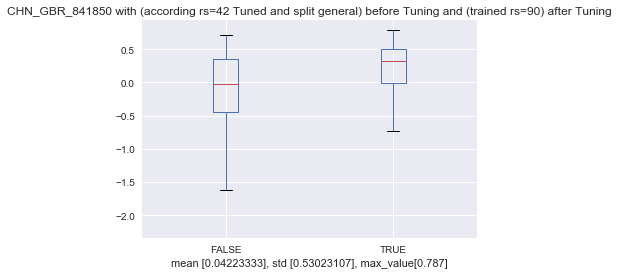

In [284]:
repeats=3
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()


#RS =42ye gore bulunan Tuning sonucları: 

#841840 Parametre seti
est=5000
min_leaf=1
feat="log2"
max_leaf=10
min_weight=0.001
min_impurity=0.0000001

#841810 Parametre seti
est=10000
min_leaf=2
feat="sqrt"
max_leaf=150
min_weight=0.01
min_impurity=0.000001

#841850  Parametre seti
est=2000
min_leaf=20
feat=10
max_leaf=50
min_weight=0.1
min_impurity=0.01


#RS =42ye gore bulunan Tuning sonucları: 
#RS =Randoma gore bulunan Tuning sonucları: 

est=10000
min_leaf=5
feat="auto"
max_leaf=100
min_weight=0.00001
min_impurity=0.001

#Etkin olan parametre seti

est=10000
min_leaf=2
feat="sqrt"
max_leaf=150
min_weight=0.01
min_impurity=0.000001

#NN için parametreler
alph= 1e-12
max_iteration= 50000
slv= "adam"
hidden_layer= (30, 30)



param_options=["FALSE","TRUE"]

#Farklı RAndom Seed Splitler
rs=random.randint(1,100)
#Tek bir Random Seed Split
rs=42

SplitData=TrainTestSplit(rs,X,y,date,th,random_split)

train_X=SplitData[0] 
test_X=SplitData[1] 
train_y=SplitData[2] 
test_y=SplitData[3]
scaler_x=SplitData[4]
scaler_y=SplitData[5]
split_succesfull=SplitData[7]


experiment="NN" #or RF
first_loop_range=50
second_loop_range=2
for r in range (0,first_loop_range):
    rs=random.randint(1,100)
   
    SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
    print(rs)
    train_X=SplitData[0] 
    test_X=SplitData[1] 
    train_y=SplitData[2] 
    test_y=SplitData[3]
    scaler_x=SplitData[4]
    scaler_y=SplitData[5]
    split_succesfull=SplitData[7]
    
    
    for p in range (0, second_loop_range):
        
        param=param_options[p]
        
        if experiment=="RF":
            experiment_result=experiment_RF(repeats,param,est,min_leaf,rs,
                                    feat,max_leaf,min_weight,min_impurity,
                                    train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        elif experiment=="NN":
             experiment_result=experiment_NN(repeats,param,alph,max_iteration,slv,rseed,hidden_layer,
                          train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        
        results_exp[param]= experiment_result
        
#    results_split[split_succesfull]= experiment_result
    results=pd.concat([results,results_exp])

results_randomnumber_bins=results
resultvalues=results.values
results_all=resultvalues.reshape((first_loop_range*second_loop_range*repeats,1))
results_all=pd.DataFrame(data=results_all[:,:])

mean=results_all.describe().values[1]
std=results_all.describe().values[2]
max_R2=results_all.describe().values[7]

plt.gcf().clear()
plt.title('{} with (according rs=42 Tuned and split general) before Tuning and (trained rs=90) after Tuning'.format(y.name))
plt.xlabel('mean {}, std {}, max_value{}'.format(mean,std,max_R2))
results.boxplot()
plt.savefig('Distiribution_without_Tuning\Box Plot R2 for {} and (tuned rs =42)(split=general){} (trained rs=90) different run.png'.format(y.name,repeats), 
            format='png', dpi=300)

pyplot.show()                                   

      




#sonuc=pd.concat([sonuc,calıstır_randomforest(X_train, X_test, y_train, y_test,scaler_y,Product,MonthSerie,ScalerType)])

#max_R2=int((sonuc['R2'].max())*1000)/1000
#filename='Out_Random_Predict_Results_{one}_Product{two}_{four}perc_with max{tre}'.format(one=datetime.now().strftime('Date_%m-%d_Time%H_%M'),
#                                                                                      two=Product,tre=max_R2,four=percentile)
#sonuc.to_excel('{}.xlsx'.format(filename),index = False)      
      



FEATURE SELECTION BLOGU

In [ ]:
# 3 Nolu Blok
# Internetten bulunan kod blogu
# http://blog.datadive.net/selecting-good-features-part-iii-random-forests/
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict
from operator import itemgetter, attrgetter

def getKey(item):
    return item[0]


#y=set_y(Product,XY)
#Z=set_z(Product,XY)
#X=set_X(Product,XY)
names=list(X.columns.values)

#X= Xscaler(X,y,ScalerType)

values = X.values
values = values.astype('float32')
scaler_x= MinMaxScaler(feature_range=(0, 1))

scaled_value_x = scaler_x.fit_transform(values)
X = pd.DataFrame(data=scaled_value_x[:,:])

rf = RandomForestRegressor()

number_of_split=100
number_of_row=27
number_of_features = X.shape[1]


scores = defaultdict(list)
#feature_indices = 
random_state_options = np.arange(0,number_of_split)
predictions= np.ones((number_of_row, number_of_split))
feature_indices = np.ones((number_of_features, number_of_split))
feature_importances=np.ones((number_of_features, number_of_split))

feature_score=np.zeros((number_of_features))
feature_indices_score=np.ones((number_of_features))
feature_importances_score=np.ones((number_of_features))

#R2=defaultdict(list)
R2=np.ones(number_of_split)
j=0

sonuc =[]
#crossvalidate the scores on a number of different random splits of the data

#for train_idx, test_idx in ShuffleSplit(len(X), 10, .2):
for train_idx, test_idx in ShuffleSplit(len(X), number_of_split, .2):
     
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = y.iloc[train_idx], y.iloc[test_idx]

    RandomForestRegressor.fit(rf,X_train, Y_train)    

    predictions[:,j] = rf.predict(X_test)
    acc = int(1000*(r2_score(Y_test, rf.predict(X_test))))/1000
    R2[j] = int(1000*(r2_score(Y_test, rf.predict(X_test))))/1000
    
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)

    feature_indices[:,j]=indices
    feature_importances[:,j]=importances

    j=j+1

R2_Adj=1-R2
score_coefficient=number_of_features*(R2_Adj - np.max(R2_Adj))/-np.ptp(R2_Adj)

    
for i in range(number_of_features):
    feature_score[i]=0
    feature_indices_score[i]=0
    feature_importances_score[i]=0
    
    for j in range(number_of_split):
        
        indice_coeff=feature_indices[i,j]+1
        importances_coeff=int((feature_importances[i,j]*10000))/10000
        score_coeff=int((score_coefficient[j]+1)*10)/10

        feature_indices_score[i]=feature_indices_score[i]+(indice_coeff)
        feature_importances_score[i]=feature_importances_score[i]+(importances_coeff)

        
#        score=score_coeff*(indice_coeff)
        score=score_coeff*(importances_coeff)
        feature_score[i]=feature_score[i]+score
#    print( feature_score[i],'number_of_split',j+1) #,names[feature_indices[i,j]])
    
scored_feature_indices = np.argsort(feature_score)
 
    
# Plot the feature importances of the forest
plt.gcf().clear()
plt.figure()
plt.title("{} and -{} Month Cumulative Feature and Score Importances with {} Different Splits".format(Product,MonthSeries,number_of_split))

plt.bar(range(number_of_features), feature_score[scored_feature_indices][::-1],
       color="r",  align="center")
plt.xticks(range(number_of_features), scored_feature_indices[::-1],rotation=90)
plt.xlim([-1, number_of_features])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("{} and -{} Month Cumulative Feature and Score Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split), format='png', dpi=300)
plt.show()

    #Feature Reduction percentile oranına göre oluyor


threshold_for_feature_selection=np.percentile(feature_score[scored_feature_indices], percentile)
X=X.iloc[:,scored_feature_indices[feature_score[scored_feature_indices]>threshold_for_feature_selection]]



In [141]:


#def experiment(repeats,n_epochs,n_neurons,learning_rate,bs,rs,X,y,date):
def experiment_LSTM(repeats,n_epochs,n_neurons,learning_rate,bs,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y):
    K.clear_session()

#    print(type(train_X))
    train_X =train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

#    train_X =train_X.reshape((train_X.shape[0], train_X.shape[1],1))
#    test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],1))
#    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
    
    error_rmse = list()
    error_r2hat = list()
    error_r2 = list()
    for r in range(repeats):
        
        print('Shape of X Train',train_X.shape[1],train_X.shape[2])
    

        if do_model=='A':
            model = Sequential() 
            model.add(LSTM(n_neurons,input_shape=(train_X.shape[1], train_X.shape[2])))
            model.add(Dropout(drop_rate))
            
            model.add(Dense(n_neurons))
            model.add(Dropout(drop_rate))
            
            model.add(Dense(1))
#            model.add(Activation('sigmoid'))
            model.add(Activation('linear'))
        
        elif do_model=='B':   
            input_layer=Input(shape=(train_X.shape[1], train_X.shape[2]),dtype='float32')
            lstm_layer1=LSTM(n_neurons,input_shape=(train_X.shape[1],train_X.shape[2]),
                         dropout=drop_rate, 
                         recurrent_dropout=drop_rate,
                         return_sequences=True)(input_layer)
            lstm_layer2=LSTM(n_neurons,input_shape=(train_X.shape[1],n_neurons),
                         dropout=drop_rate, 
                         recurrent_dropout=drop_rate,
                         return_sequences=False)(lstm_layer1)
            dropout_layer=Dropout(drop_rate)(lstm_layer2)

            output_layer=Dense(1,activation="linear")(dropout_layer)
#            output_layer=Dense(1,activation="linear")(lstm_layer2)
         

        #ix layerlarda Activation için RELU Output için linear uygun oluyor. Kaynak Siraj Raval
        
            model=Model(inputs=input_layer, outputs=output_layer)
        
        
        #decay_rate = learning_rate / n_epochs
        
        decay_rate = 0.8
        momentum = 0.9
         
        sgd = optimizers.SGD(lr=learning_rate, clipvalue=0.3,momentum=momentum, decay=decay_rate,nesterov=True)
        adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay_rate, amsgrad=False)

        #model.compile(loss='mean_squared_error', optimizer='adam')
        
        
#        model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
        model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

#        model=load_model(os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(y.name,n_neurons)))
#        model=load_model(os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(y.name,n_neurons)))

        model.summary()
        
        save_weights_at=os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(y.name,n_neurons))

        save_best=ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                                 save_best_only=True, save_weights_only=False, mode='min',
                                 period=1)
        
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001)
        early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
        
        history = model.fit(train_X, train_y, epochs=n_epochs, batch_size=bs, 

                            validation_data=(test_X, test_y), verbose=1, 
#                            callbacks=[reduce_lr],
                           # callbacks=[save_best],

                           # callbacks=[early_stop],
                            shuffle=False)

#        best_model=load_model(os.path.join('Data','train_dataset.hdf5')
#        model=load_model(os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(y.name,n_neurons)))

        #model=best_model

        
        

        
        # summarize history for loss
        plt.gcf().clear()
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

        
        # summarize history for accuracy
#        plt.plot(history.history['acc'])
#        plt.plot(history.history['val_acc'])
#        plt.title('model accuracy')
#        plt.ylabel('accuracy')
#        plt.xlabel('epoch')
#        plt.legend(['train', 'test'], loc='upper left')
#        plt.show()


#        test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[1]))

        test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))
        inv_x_test = scaler_x.inverse_transform(test_X_reshaped)
        inv_x_test = pd.DataFrame(data=inv_x_test[:,:])

        # make a prediction
        y_predict_test = model.predict(test_X)
        y_predict_train = model.predict(train_X)

        # invert scaling for forecast
        inv_y_predict_test = scaler_y.inverse_transform(y_predict_test)
        inv_y_predict_test = inv_y_predict_test[:,0]
        inv_y_predict_train = scaler_y.inverse_transform(y_predict_train)
        inv_y_predict_train = inv_y_predict_train[:,0]

        # invert scaling for actual
        y_test = test_y.reshape((len(test_y), 1))
        inv_y_test = scaler_y.inverse_transform(test_y)
        inv_y_test = inv_y_test[:,0]

        y_train = train_y.reshape((len(train_y), 1))
        inv_y_train = scaler_y.inverse_transform(train_y)
        inv_y_train = inv_y_train[:,0]

        # calculate RMSE for DIFFERENCE
        rmse_test = sqrt(mean_squared_error(inv_y_test, inv_y_predict_test))
        print('Test RMSE: %.3f' % rmse_test)
        R2_test=int(1000*(metrics.r2_score(inv_y_test, inv_y_predict_test)))/1000
        print('R2_test: %.3f' % R2_test)

        rmse_train = sqrt(mean_squared_error(inv_y_train, inv_y_predict_train))
        print('Train RMSE: %.3f' % rmse_train)
        R2_train=int(1000*(metrics.r2_score(inv_y_train, inv_y_predict_train)))/1000
        print('R2_train: %.3f' % R2_train)

        # calculate RMSE for REAL VALUE

        real_y_test= inv_x_test.iloc[:,0]+inv_y_test
        real_y_predict_test=inv_x_test.iloc[:,0]+inv_y_predict_test
        
        real_rmse_test = sqrt(mean_squared_error(real_y_test, real_y_predict_test))
        print('Test RMSE: %.3f' % real_rmse_test)
        real_R2_test=int(1000*(metrics.r2_score(real_y_test, real_y_predict_test)))/1000
        print('R2_test: %.3f' % real_R2_test)
        
        error_rmse.append(real_rmse_test)
        error_r2hat.append(real_R2_test)
        error_r2.append(R2_test)
        
        
        plt.gcf().clear()
        plt.figure(figsize=(5.5, 5.5))
        plt.plot(range(len(inv_y_test)), inv_y_test, linestyle='-', marker='*', color='r')
        plt.plot(range(len(inv_y_predict_test)), inv_y_predict_test, linestyle='-', marker='.', color='b')
        plt.legend(['Actual','Predicted'], loc=2)
        plt.title('Actual vs Predicted for {}'.format(y.name))
        plt.ylabel('Trade Value')
        plt.xlabel('Index')
        plt.savefig('Data/LSTM-LinePlt{} ,{} epochs,{} neurons,{} learning_rate,{} batch size, {} random, {} R2.png'.format(y.name,
                                n_epochs,n_neurons,learning_rate,bs,rs,R2_test), format='png', dpi=300)
       

        
        
    return error_rmse,error_r2,error_r2hat,train_y,history

(96, 1, 135) (96, 1) (24, 1, 135) (24, 1)
Shape of X Train 1 135
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 135)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 300)            523200    
_________________________________________________________________
lstm_2 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301       
Total params: 1,244,701
Trainable params: 1,244,701
Non-trainable params: 0
_________________________________________________________________
Train on 96 samples, validate on 24 samples
Epoch 1/2000
96/96 [===

96/96 [==============================] - 4s 43ms/step - loss: 0.0183 - acc: 0.0208 - val_loss: 0.0159 - val_acc: 0.0000e+00
Epoch 112/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0183 - acc: 0.0208 - val_loss: 0.0159 - val_acc: 0.0000e+00
Epoch 113/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0183 - acc: 0.0208 - val_loss: 0.0159 - val_acc: 0.0000e+00
Epoch 114/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0183 - acc: 0.0208 - val_loss: 0.0159 - val_acc: 0.0000e+00
Epoch 115/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0183 - acc: 0.0208 - val_loss: 0.0159 - val_acc: 0.0000e+00
Epoch 116/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0183 - acc: 0.0208 - val_loss: 0.0159 - val_acc: 0.0000e+00
Epoch 117/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0183 - acc: 0.0208 - val_loss: 0.0159 - val_acc: 0.0000e+00
Epoch 118/2000
96/96 [====================

96/96 [==============================] - 4s 41ms/step - loss: 0.0178 - acc: 0.0208 - val_loss: 0.0157 - val_acc: 0.0000e+00
Epoch 171/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0178 - acc: 0.0208 - val_loss: 0.0157 - val_acc: 0.0000e+00
Epoch 172/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0178 - acc: 0.0208 - val_loss: 0.0157 - val_acc: 0.0000e+00
Epoch 173/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0178 - acc: 0.0208 - val_loss: 0.0157 - val_acc: 0.0000e+00
Epoch 174/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0178 - acc: 0.0208 - val_loss: 0.0157 - val_acc: 0.0000e+00
Epoch 175/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0178 - acc: 0.0208 - val_loss: 0.0157 - val_acc: 0.0000e+00
Epoch 176/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0178 - acc: 0.0208 - val_loss: 0.0157 - val_acc: 0.0000e+00
Epoch 177/2000
96/96 [====================

96/96 [==============================] - 4s 42ms/step - loss: 0.0175 - acc: 0.0208 - val_loss: 0.0155 - val_acc: 0.0000e+00
Epoch 230/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0175 - acc: 0.0208 - val_loss: 0.0155 - val_acc: 0.0000e+00
Epoch 231/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0174 - acc: 0.0208 - val_loss: 0.0155 - val_acc: 0.0000e+00
Epoch 232/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0174 - acc: 0.0208 - val_loss: 0.0155 - val_acc: 0.0000e+00
Epoch 233/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0174 - acc: 0.0208 - val_loss: 0.0155 - val_acc: 0.0000e+00
Epoch 234/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0174 - acc: 0.0208 - val_loss: 0.0155 - val_acc: 0.0000e+00
Epoch 235/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0174 - acc: 0.0208 - val_loss: 0.0155 - val_acc: 0.0000e+00
Epoch 236/2000
96/96 [====================

96/96 [==============================] - 4s 42ms/step - loss: 0.0172 - acc: 0.0208 - val_loss: 0.0154 - val_acc: 0.0000e+00
Epoch 289/2000
96/96 [==============================] - 4s 43ms/step - loss: 0.0172 - acc: 0.0208 - val_loss: 0.0154 - val_acc: 0.0000e+00
Epoch 290/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0172 - acc: 0.0208 - val_loss: 0.0154 - val_acc: 0.0000e+00
Epoch 291/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0172 - acc: 0.0208 - val_loss: 0.0154 - val_acc: 0.0000e+00
Epoch 292/2000
96/96 [==============================] - 4s 43ms/step - loss: 0.0172 - acc: 0.0208 - val_loss: 0.0154 - val_acc: 0.0000e+00
Epoch 293/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0172 - acc: 0.0208 - val_loss: 0.0154 - val_acc: 0.0000e+00
Epoch 294/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0171 - acc: 0.0208 - val_loss: 0.0154 - val_acc: 0.0000e+00
Epoch 295/2000
96/96 [====================

96/96 [==============================] - 4s 43ms/step - loss: 0.0169 - acc: 0.0208 - val_loss: 0.0153 - val_acc: 0.0000e+00
Epoch 348/2000
96/96 [==============================] - 4s 43ms/step - loss: 0.0169 - acc: 0.0208 - val_loss: 0.0153 - val_acc: 0.0000e+00
Epoch 349/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0169 - acc: 0.0208 - val_loss: 0.0153 - val_acc: 0.0000e+00
Epoch 350/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0169 - acc: 0.0208 - val_loss: 0.0153 - val_acc: 0.0000e+00
Epoch 351/2000
96/96 [==============================] - 4s 43ms/step - loss: 0.0169 - acc: 0.0208 - val_loss: 0.0153 - val_acc: 0.0000e+00
Epoch 352/2000
96/96 [==============================] - 4s 44ms/step - loss: 0.0169 - acc: 0.0208 - val_loss: 0.0153 - val_acc: 0.0000e+00
Epoch 353/2000
96/96 [==============================] - 4s 44ms/step - loss: 0.0169 - acc: 0.0208 - val_loss: 0.0153 - val_acc: 0.0000e+00
Epoch 354/2000
96/96 [====================

96/96 [==============================] - 4s 40ms/step - loss: 0.0167 - acc: 0.0208 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 407/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0167 - acc: 0.0208 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 408/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0167 - acc: 0.0208 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 409/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0167 - acc: 0.0208 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 410/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0167 - acc: 0.0208 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 411/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0167 - acc: 0.0208 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 412/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0167 - acc: 0.0208 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 413/2000
96/96 [====================

96/96 [==============================] - 4s 41ms/step - loss: 0.0166 - acc: 0.0208 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 466/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0166 - acc: 0.0208 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 467/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0166 - acc: 0.0208 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 468/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0166 - acc: 0.0208 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 469/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0166 - acc: 0.0208 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 470/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0166 - acc: 0.0208 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 471/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0166 - acc: 0.0208 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 472/2000
96/96 [====================

96/96 [==============================] - 4s 40ms/step - loss: 0.0164 - acc: 0.0208 - val_loss: 0.0151 - val_acc: 0.0000e+00
Epoch 525/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0164 - acc: 0.0208 - val_loss: 0.0151 - val_acc: 0.0000e+00
Epoch 526/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0164 - acc: 0.0208 - val_loss: 0.0151 - val_acc: 0.0000e+00
Epoch 527/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0164 - acc: 0.0208 - val_loss: 0.0151 - val_acc: 0.0000e+00
Epoch 528/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0164 - acc: 0.0208 - val_loss: 0.0151 - val_acc: 0.0000e+00
Epoch 529/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0164 - acc: 0.0208 - val_loss: 0.0151 - val_acc: 0.0000e+00
Epoch 530/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0164 - acc: 0.0208 - val_loss: 0.0151 - val_acc: 0.0000e+00
Epoch 531/2000
96/96 [====================

96/96 [==============================] - 4s 43ms/step - loss: 0.0163 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 584/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0163 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 585/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0163 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 586/2000
96/96 [==============================] - 4s 43ms/step - loss: 0.0163 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 587/2000
96/96 [==============================] - 4s 42ms/step - loss: 0.0163 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 588/2000
96/96 [==============================] - 4s 43ms/step - loss: 0.0163 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 589/2000
96/96 [==============================] - 4s 44ms/step - loss: 0.0163 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 590/2000
96/96 [====================

96/96 [==============================] - 4s 39ms/step - loss: 0.0162 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 643/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0162 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 644/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0162 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 645/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0162 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 646/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0162 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 647/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0162 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 648/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0162 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 649/2000
96/96 [====================

96/96 [==============================] - 4s 39ms/step - loss: 0.0161 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 702/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0161 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 703/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0161 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 704/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0161 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 705/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0161 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 706/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0161 - acc: 0.0208 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 707/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0161 - acc: 0.0208 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 708/2000
96/96 [====================

96/96 [==============================] - 4s 40ms/step - loss: 0.0160 - acc: 0.0208 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 761/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0160 - acc: 0.0208 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 762/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0160 - acc: 0.0208 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 763/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0160 - acc: 0.0208 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 764/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0160 - acc: 0.0208 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 765/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0160 - acc: 0.0208 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 766/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0160 - acc: 0.0208 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 767/2000
96/96 [====================

96/96 [==============================] - 4s 39ms/step - loss: 0.0159 - acc: 0.0208 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 820/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0159 - acc: 0.0208 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 821/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0159 - acc: 0.0208 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 822/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0159 - acc: 0.0208 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 823/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0159 - acc: 0.0208 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 824/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0159 - acc: 0.0208 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 825/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0159 - acc: 0.0208 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 826/2000
96/96 [====================

96/96 [==============================] - 4s 39ms/step - loss: 0.0158 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 879/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0158 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 880/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0158 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 881/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0158 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 882/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0158 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 883/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0158 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 884/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0158 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 885/2000
96/96 [====================

96/96 [==============================] - 4s 37ms/step - loss: 0.0157 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 938/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0157 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 939/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0157 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 940/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0157 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 941/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0157 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 942/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0157 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 943/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0157 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 944/2000
96/96 [====================

96/96 [==============================] - 4s 38ms/step - loss: 0.0156 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 997/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0156 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 998/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0156 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 999/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0156 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 1000/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0156 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 1001/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0156 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 1002/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0156 - acc: 0.0208 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 1003/2000
96/96 [================

96/96 [==============================] - 4s 37ms/step - loss: 0.0155 - acc: 0.0208 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 1113/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0155 - acc: 0.0208 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 1114/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0155 - acc: 0.0208 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 1115/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0155 - acc: 0.0208 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 1116/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0155 - acc: 0.0208 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 1117/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0155 - acc: 0.0208 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 1118/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0155 - acc: 0.0208 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 1119/2000
96/96 [=============

96/96 [==============================] - 4s 39ms/step - loss: 0.0154 - acc: 0.0208 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 1229/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0154 - acc: 0.0208 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 1230/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0154 - acc: 0.0208 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 1231/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0154 - acc: 0.0208 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 1232/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0154 - acc: 0.0208 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 1233/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0154 - acc: 0.0208 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 1234/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0154 - acc: 0.0208 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 1235/2000
96/96 [=============

96/96 [==============================] - 4s 37ms/step - loss: 0.0153 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1345/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0153 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1346/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0153 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1347/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0153 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1348/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0153 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1349/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0153 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1350/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0153 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1351/2000
96/96 [=============

96/96 [==============================] - 4s 37ms/step - loss: 0.0152 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1461/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0152 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1462/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0152 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1463/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0152 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1464/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0152 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1465/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0152 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1466/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0152 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1467/2000
96/96 [=============

96/96 [==============================] - 4s 37ms/step - loss: 0.0151 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1577/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0151 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1578/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0151 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1579/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0151 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1580/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0151 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1581/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0151 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1582/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0151 - acc: 0.0208 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 1583/2000
96/96 [=============

96/96 [==============================] - 4s 39ms/step - loss: 0.0150 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1693/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0150 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1694/2000
96/96 [==============================] - 4s 39ms/step - loss: 0.0150 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1695/2000
96/96 [==============================] - 4s 40ms/step - loss: 0.0150 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1696/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0150 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1697/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0150 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1698/2000
96/96 [==============================] - 4s 41ms/step - loss: 0.0150 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1699/2000
96/96 [=============

96/96 [==============================] - 4s 37ms/step - loss: 0.0149 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1809/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0149 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1810/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0149 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1811/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0149 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1812/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0149 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1813/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0149 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1814/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0149 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1815/2000
96/96 [=============

96/96 [==============================] - 4s 37ms/step - loss: 0.0148 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1925/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0148 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1926/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0148 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1927/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0148 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1928/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0148 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1929/2000
96/96 [==============================] - 4s 37ms/step - loss: 0.0148 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1930/2000
96/96 [==============================] - 4s 38ms/step - loss: 0.0148 - acc: 0.0208 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 1931/2000
96/96 [=============

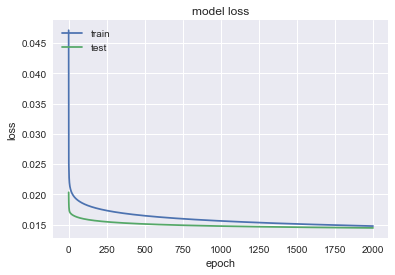

Test RMSE: 2310.817
R2_test: 0.523
Train RMSE: 2334.910
R2_train: 0.629
Test RMSE: 2310.817
R2_test: 0.997
[0.523]
[0.997]


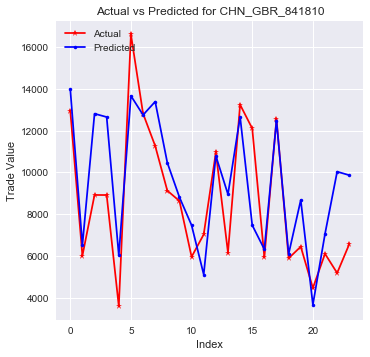

In [147]:
#rs=29
rs=42
repeats = 1
drop_rate=0.0
do_batch='TRUE'
do_model='B'
random_split='TRUE'
SplitData=TrainTestSplit(rs,X,y,date,th,random_split)

e=2000
n=300
lr=0.01
b=1

train_X=SplitData[0] 
test_X=SplitData[1] 
train_y=SplitData[2] 
test_y=SplitData[3]
scaler_x=SplitData[4]
scaler_y=SplitData[5]

deney=experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)

error_rmse=deney[0] 
error_r2=deney[1] 
error_r2hat=deney[2] 
train_y=deney[3]
history=deney[4]
print(error_r2)
print(error_r2hat)

In [109]:
train_X.shape

(96, 135)

In [47]:
#rs=29
rs=42
repeats = 1
SplitData=TrainTestSplit(rs,X,y,date,th,random_split)

e=200
n=400
lr=0.001
b=30

train_X=SplitData[0] 
test_X=SplitData[1] 
train_y=SplitData[2] 
test_y=SplitData[3]
scaler_x=SplitData[4]
scaler_y=SplitData[5]

deney=experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)

error_rmse=deney[0] 
error_r2=deney[1] 
error_r2hat=deney[2] 
train_y=deney[3]
history=deney[4]
print(error_r2)
print(error_r2hat)

NameError: name 'experiment_LSTM' is not defined

In [13]:

def experiment_RF(repeats,param,est,min_leaf,random,feat,max_leaf,min_weight,min_impurity,train_X, test_X, train_y, test_y,scaler_x,scaler_y):

    
    error_rmse = list()
    error_r2hat = list()
    error_r2 = list()
    for r in range(repeats):
        
        if param== 'TRUE':
            rfc_model=RandomForestRegressor(n_estimators=est,
                              min_samples_leaf=min_leaf,
                          #    random_state =random,
                              max_features=feat,
                              max_leaf_nodes=max_leaf,
                              min_weight_fraction_leaf =min_weight,
                              min_impurity_split=min_impurity
                             )
        elif param== 'FALSE':
            rfc_model=RandomForestRegressor()

        RandomForestRegressor.fit(rfc_model,train_X,train_y)
        
        # make a prediction
        y_predict_test = rfc_model.predict(test_X)
        y_predict_train = rfc_model.predict(train_X)


        #test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#        test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))
        inv_x_test = scaler_x.inverse_transform(test_X)
        inv_x_test = pd.DataFrame(data=inv_x_test[:,:])


        # invert scaling for forecast
        inv_y_predict_test = scaler_y.inverse_transform(y_predict_test)
#        inv_y_predict_test = inv_y_predict_test[:,0]
        inv_y_predict_train = scaler_y.inverse_transform(y_predict_train)
#        inv_y_predict_train = inv_y_predict_train[:,0]

        # invert scaling for actual
        y_test = test_y.reshape((len(test_y), 1))
        inv_y_test = scaler_y.inverse_transform(test_y)
        inv_y_test = inv_y_test[:,0]

        y_train = train_y.reshape((len(train_y), 1))
        inv_y_train = scaler_y.inverse_transform(train_y)
        inv_y_train = inv_y_train[:,0]

        # calculate RMSE for DIFFERENCE
        rmse_test = sqrt(mean_squared_error(inv_y_test, inv_y_predict_test))
#        print('Test RMSE: %.3f' % rmse_test)
        R2_test=int(1000*(metrics.r2_score(inv_y_test, inv_y_predict_test)))/1000
#        print('R2_test: %.3f' % R2_test)

        rmse_train = sqrt(mean_squared_error(inv_y_train, inv_y_predict_train))
#        print('Train RMSE: %.3f' % rmse_train)
        R2_train=int(1000*(metrics.r2_score(inv_y_train, inv_y_predict_train)))/1000
#        print('R2_train: %.3f' % R2_train)

        # calculate RMSE for REAL VALUE

        real_y_test= inv_x_test.iloc[:,0]+inv_y_test
        real_y_predict_test=inv_x_test.iloc[:,0]+inv_y_predict_test
        
        real_rmse_test = sqrt(mean_squared_error(real_y_test, real_y_predict_test))
#        print('Test RMSE: %.3f' % real_rmse_test)
        real_R2_test=int(1000*(metrics.r2_score(real_y_test, real_y_predict_test)))/1000
#        print('R2_test: %.3f' % real_R2_test)
        
        error_rmse.append(real_rmse_test)
        error_r2hat.append(real_R2_test)
        error_r2.append(R2_test)
        
#        plt.gcf().clear()
#        plt.figure(figsize=(5.5, 5.5))
#        plt.plot(range(len(inv_y_test)), inv_y_test, linestyle='-', marker='*', color='r')
#        plt.plot(range(len(inv_y_predict_test)), inv_y_predict_test, linestyle='-', marker='.', color='b')
#        plt.legend(['Actual','Predicted'], loc=2)
#        plt.title('Actual vs Predicted for {}'.format(y.name))
#        plt.ylabel('Trade Value')
#        plt.xlabel('Index')
#        plt.savefig('Data/RF-LinePlt{} ,{} est,{} min_leaf,{} rs_for split,{} max_leaf, {} min_weight,{}min_impurity, {} R2.png'.format(y.name,
#                                est,min_leaf,random,feat,max_leaf,min_weight,min_impurity,R2_test), format='png', dpi=300)
       

        
        
    return error_rmse,error_r2,error_r2hat,train_y

#X2 ve X3 için denemelerde kullanılan parametreler
estimator_options = [100,1000,2000,5000]
min_sample_leaf_options = [1,2,5,20,30]
#random_state_options =[10]
max_features_options=[10,"log2","sqrt","auto"]
max_leaf_nodes_options=[2,5,10,50,100] 
min_weight_fraction_leaf_options=[0.0001,0.001,0.01,0.1] 
min_impurity_decrease_options =[0.0000001,0.000001,0.001,0.01]

est=estimator_options[2]
min_leaf=min_sample_leaf_options[0]
feat=max_features_options[0]
max_leaf=max_leaf_nodes_options[1]
min_weight=min_weight_fraction_leaf_options[0]
min_impurity=min_impurity_decrease_options[3]

Start Set
est=2000
min_leaf=1
feat=max_10
max_leaf=5
min_weight=0.0001
min_impurity=0.001

RS =42Ye gore bulunan Tuning sonucları:
841840 için:
est=5000
min_leaf=1
feat="log2"
max_leaf=10
min_weight=0.001
min_impurity=0.0000001

841850 için:
est=2000
min_leaf=20
feat=10
max_leaf=50
min_weight=0.1
min_impurity=0.01

841810 icin
est=10000
min_leaf=2
feat="sqrt"
max_leaf=150
min_weight=0.01
min_impurity=0.000001

GENEL RS farklı oldugundaki Tuning sonucları
841850 için:


841840 için
est=10000
min_leaf=5
feat="auto"
max_leaf=100
min_weight=0.00001
min_impurity=0.001


NN 841850 için: ve RS=42 Splite göre yaıplan Tuning

alph= 1e-12
max_iteration= 50000
slv= "adam"
hidden_layer= (30, 30)

In [16]:

rs=42
repeats = 3
SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
results = DataFrame()


estimator_options = [100,200,500,1000,5000,10000,20000]
min_sample_leaf_options = [1,2,5,20,30]
#random_state_options =[10]
max_features_options=[10,"log2","sqrt","auto"]
max_leaf_nodes_options=[2,5,10,100,200,300] 
min_weight_fraction_leaf_options=[0.00001,0.0001,0.001,0.01,0.1] 
min_impurity_decrease_options =[0.0000001,0.000001,0.001,0.01,0.05]

param='TRUE'
est=estimator_options[2]
min_leaf=min_sample_leaf_options[0]
feat=max_features_options[2]
max_leaf=max_leaf_nodes_options[3]
min_weight=min_weight_fraction_leaf_options[1]
min_impurity=min_impurity_decrease_options[3]


est=200
min_leaf=2
feat="log2"
max_leaf=5
min_weight=0.01
min_impurity=0.000001
print("parameter usage", param)
print("est=", est)
print("min_sample_leaf=", min_leaf)
print("max_features=",feat)
print("max_leaf_nodes=", max_leaf)
print("min_weight_fraction_leaf=", min_weight)
print("min_impurity_decrease=", min_impurity)

results=experiment_RF(repeats,param,est,min_leaf,rs,feat,max_leaf,min_weight,min_impurity,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
print(results)




parameter usage TRUE
est= 200
min_sample_leaf= 2
max_features= log2
max_leaf_nodes= 5
min_weight_fraction_leaf= 0.01
min_impurity_decrease= 1e-06
[0.526, 0.514, 0.506]


Size: 5000
                 1            2            5           20           30
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.463214     0.457591     0.459892     0.388244     0.373012
std       0.148081     0.149627     0.150515     0.164345     0.157916
min       0.019000    -0.015000    -0.073000    -0.026000    -0.020000
25%       0.368000     0.375250     0.366750     0.282000     0.266750
50%       0.449000     0.436000     0.434000     0.390000     0.392500
75%       0.583000     0.582250     0.584250     0.520000     0.493000
max       0.769000     0.770000     0.794000     0.678000     0.641000


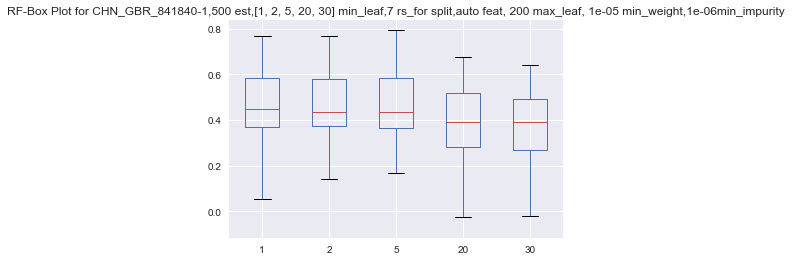

In [126]:

results_exp = DataFrame()
results = DataFrame()

for r in range (0,100):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for min_leaf in min_sample_leaf_options:
            results_exp[str(min_leaf)] = experiment_RF(repeats,param,est,min_leaf,rs,feat,max_leaf,min_weight,min_impurity,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot


plt.gcf().clear()
results.boxplot()
plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_sample_leaf_options,rs,feat,max_leaf,min_weight,min_impurity))
plt.savefig('Data/15 Mayıs/RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weight,{}min_impurity.png'
               .format(y.name,MonthSeries,est,min_sample_leaf_options,feat,max_leaf,min_weight,min_impurity))





Size: 240
              10       log2       sqrt       auto
count  60.000000  60.000000  60.000000  60.000000
mean    0.461983   0.464517   0.466483   0.448683
std     0.135810   0.126872   0.127284   0.153052
min     0.187000   0.185000   0.207000   0.177000
25%     0.355000   0.386500   0.379750   0.342500
50%     0.452500   0.481500   0.470500   0.406000
75%     0.577500   0.572500   0.578750   0.580500
max     0.707000   0.668000   0.678000   0.729000


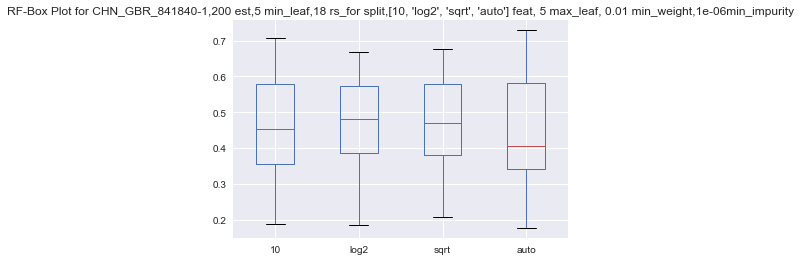

In [17]:
results_exp = DataFrame()
results = DataFrame()
est=200
min_leaf=5
feat="log2"
max_leaf=5
min_weight=0.01
min_impurity=0.000001

for r in range (0,20):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]
        
        for feat in max_features_options:
            results_exp[str(feat)] = experiment_RF(repeats,param,est,min_leaf,rs,feat,max_leaf,min_weight,min_impurity,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        
        
        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_leaf,rs,max_features_options,max_leaf,min_weight,min_impurity))
plt.savefig('Data/15 Mayıs/RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weight,{}min_impurity.png'
               .format(y.name,MonthSeries,est,min_leaf,max_features_options,max_leaf,min_weight,min_impurity))






est= 200
min_sample_leaf= 5
max_features= auto
max_leaf_nodes= 5
min_weight_fraction_leaf= 0.01
min_impurity_decrease= 1e-06
Size: 540
               2          5         10        100        200        300
count  90.000000  90.000000  90.000000  90.000000  90.000000  90.000000
mean    0.447633   0.524456   0.532711   0.533689   0.532744   0.532756
std     0.141298   0.135154   0.143257   0.143416   0.142635   0.143880
min     0.130000   0.282000   0.219000   0.219000   0.229000   0.234000
25%     0.412000   0.406000   0.422750   0.417000   0.413500   0.425750
50%     0.489000   0.572000   0.565000   0.568000   0.568000   0.564500
75%     0.528750   0.622500   0.637500   0.635000   0.629750   0.639000
max     0.666000   0.771000   0.795000   0.793000   0.797000   0.793000


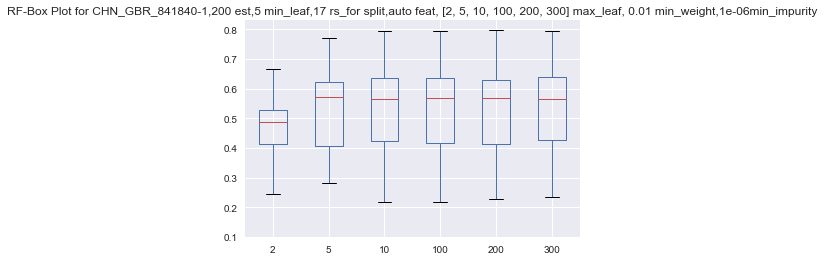

In [19]:
est=200
min_leaf=5
feat="auto"
max_leaf=5
min_weight=0.01
min_impurity=0.000001

print("est=", est)
print("min_sample_leaf=", min_leaf)
print("max_features=",feat)
print("max_leaf_nodes=", max_leaf)
print("min_weight_fraction_leaf=", min_weight)
print("min_impurity_decrease=", min_impurity)

results_exp = DataFrame()
results = DataFrame()

for r in range (0,30):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for max_leaf in max_leaf_nodes_options:
            results_exp[str(max_leaf)] = experiment_RF(repeats,param,est,min_leaf,rs,feat,max_leaf,min_weight,min_impurity,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        
        results=pd.concat([results,results_exp])
            
## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_leaf,rs,feat,max_leaf_nodes_options,min_weight,min_impurity))
plt.savefig('Data/15 Mayıs/RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weight,{}min_impurity.png'
               .format(y.name,MonthSeries,est,min_leaf,feat,max_leaf_nodes_options,min_weight,min_impurity))






est= 200
min_sample_leaf= 5
max_features= auto
max_leaf_nodes= 100
min_weight_fraction_leaf= 0.01
min_impurity_decrease= 1e-06
Size: 750
            1e-05      0.0001       0.001        0.01         0.1
count  150.000000  150.000000  150.000000  150.000000  150.000000
mean     0.502620    0.501513    0.501540    0.502560    0.489593
std      0.112427    0.115795    0.115225    0.114395    0.117812
min      0.244000    0.249000    0.237000    0.229000    0.231000
25%      0.428750    0.430750    0.422500    0.432250    0.418000
50%      0.487500    0.481500    0.481000    0.485000    0.476500
75%      0.582250    0.586000    0.591750    0.586750    0.580500
max      0.748000    0.748000    0.750000    0.744000    0.742000


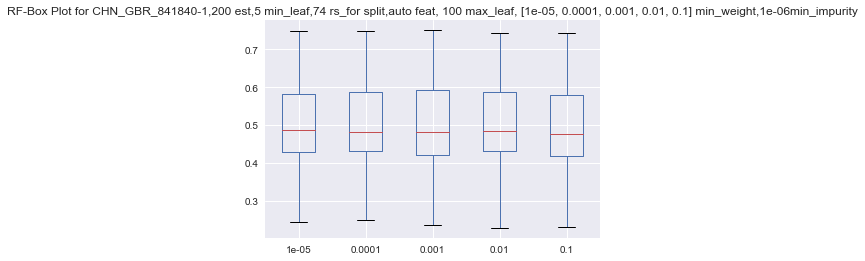

In [21]:
est=200
min_leaf=5
feat="auto"
max_leaf=100
min_weight=0.01
min_impurity=0.000001


print("est=", est)
print("min_sample_leaf=", min_leaf)
print("max_features=",feat)
print("max_leaf_nodes=", max_leaf)
print("min_weight_fraction_leaf=", min_weight)
print("min_impurity_decrease=", min_impurity)

results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]


        for min_weight in min_weight_fraction_leaf_options:
            results_exp[str(min_weight)] = experiment_RF(repeats,param,est,min_leaf,rs,feat,max_leaf,min_weight,min_impurity,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        
        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_leaf,rs,feat,max_leaf,min_weight_fraction_leaf_options,min_impurity))
plt.savefig('Data/15 Mayıs/RF-Box Plot for{}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weig,{}min_imp.png'
               .format(y.name,MonthSeries,est,min_leaf,feat,max_leaf,min_weight_fraction_leaf_options,min_impurity))






est= 200
min_sample_leaf= 5
max_features= auto
max_leaf_nodes= 100
min_weight_fraction_leaf= 1e-05
min_impurity_decrease= 1e-06
Size: 750
            1e-07       1e-06       0.001       0.01        0.05
count  150.000000  150.000000  150.000000  150.00000  150.000000
mean     0.478240    0.475820    0.479073    0.46730   -0.028200
std      0.151162    0.153334    0.151794    0.15500    0.073462
min      0.161000    0.144000    0.164000    0.14200   -0.301000
25%      0.377250    0.371250    0.388000    0.35150   -0.040000
50%      0.486500    0.487500    0.486000    0.49050   -0.009000
75%      0.618000    0.618000    0.624000    0.60325    0.008750
max      0.719000    0.712000    0.716000    0.71300    0.118000


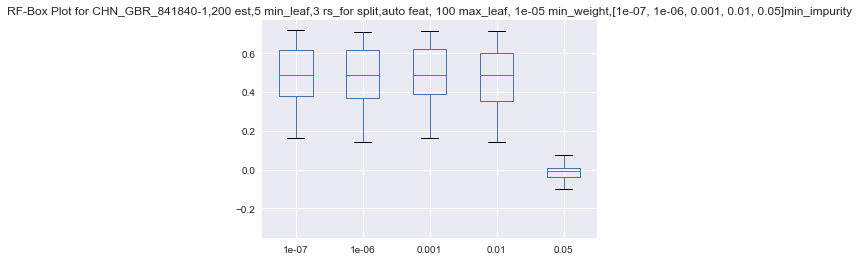

In [22]:
est=200
min_leaf=5
feat="auto"
max_leaf=100
min_weight=0.00001
min_impurity=0.000001
print("est=", est)
print("min_sample_leaf=", min_leaf)
print("max_features=",feat)
print("max_leaf_nodes=", max_leaf)
print("min_weight_fraction_leaf=", min_weight)
print("min_impurity_decrease=", min_impurity)

results_exp = DataFrame()
results = DataFrame()

for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]



        for min_impurity in min_impurity_decrease_options:
            results_exp[str(min_impurity)] = experiment_RF(repeats,param,est,min_leaf,rs,feat,max_leaf,min_weight,min_impurity,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()


plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_leaf,rs,feat,max_leaf,min_weight,min_impurity_decrease_options))
plt.savefig('Data/15 Mayıs/RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weig,{}min_impu.png'
               .format(y.name,MonthSeries,est,min_leaf,feat,max_leaf,min_weight,min_impurity_decrease_options))





In [153]:
estimator_options = [100,200,500,1000,5000,10000]

est=200
min_leaf=5
feat="auto"
max_leaf=100
min_weight=0.00001
min_impurity=0.001

results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]



        for est in estimator_options:
            results_exp[str(est)] = experiment_RF(repeats,param,est,min_leaf,rs,feat,max_leaf,min_weight,min_impurity,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()


plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  estimator_options, min_leaf,rs,feat,max_leaf,min_weight,min_impurity))
plt.savefig('Data/15 Mayıs/RF-BoxP for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} minweig,{}minimp.png'
               .format(y.name,MonthSeries,estimator_options,min_leaf,feat,max_leaf,min_weight,min_impurity))





AttributeError: 'int' object has no attribute 'randint'

LSTM ICIN

In [ ]:
results = DataFrame()

repeats = 1

# vary training epochs"
epochs = [50, 500, 1000,2000]
neurons = [5, 50,100]
learning_rates= [0.001, 0.01, 0.05, 0.1]
batch_sizes=[5, 12, 24,50,100]


e=3000
n=200
lr=0.02
b=50


e=500
n=100
lr=0.05
b=50
results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]



        for e in epochs:
            results_exp[str(e)] = experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()

results.boxplot()
plt.title("LSTM-Box Plot for {}-{}, {} epochs,{} neurons,{} learning_rate, {}batch size "
          .format(y.name,MonthSeries,epochs,n,lr,b))
plt.savefig('Data/LSTM-Box Plot for {}-{}, {} epochs,{} neurons {}lr,{}b.png'
               .format(y.name,MonthSeries,epochs,n,lr,b))




In [ ]:
results = DataFrame()

repeats = 1
e=500
n=100
lr=0.001
b=50
deney=experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)
deney[1] 

(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 5)              660       
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 886
Trainable params: 886
Non-trainable params: 0
_________________________________________________________________
Train on 104 samples, validate on 27 samples
Epoch 1/2000
104/104 [=============

Epoch 109/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0317 - acc: 0.0096 - val_loss: 0.0109 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0317 - acc: 0.0096 - val_loss: 0.0109 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0317 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 121us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 114/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 115/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 

Epoch 167/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0307 - acc: 0.0096 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 168/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0306 - acc: 0.0096 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 169/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0306 - acc: 0.0096 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 170/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0306 - acc: 0.0096 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 171/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0306 - acc: 0.0096 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 172/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0306 - acc: 0.0096 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 173/2000
104/104 [==============================] - 0s 178us/step - loss: 0.0306 - acc: 0.0096 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 130us/step - loss: 0.0292 - acc: 0.0096 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 281/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0292 - acc: 0.0096 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 282/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0292 - acc: 0.0096 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 283/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0292 - acc: 0.0096 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 284/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0292 - acc: 0.0096 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 285/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0292 - acc: 0.0096 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 286/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0292 - acc: 0.0096 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 287/2000
104/10

Epoch 395/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 396/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 397/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 398/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 400/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 401/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 135us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 510/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 511/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 512/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 513/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 514/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 515/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 516/2000
104/10

Epoch 566/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 567/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 568/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 569/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 570/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 571/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 572/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 

Epoch 624/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0270 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 625/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0270 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 626/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0270 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 627/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0270 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 628/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0270 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 629/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 630/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 

Epoch 739/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 740/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 741/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 742/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 743/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 744/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 745/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 

Epoch 854/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 855/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 856/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 857/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 858/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 859/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 860/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 

Epoch 969/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 970/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 971/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 972/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 973/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 974/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 975/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 140us/step - loss: 0.0257 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1084/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0257 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1085/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0256 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1086/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0256 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1087/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0256 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1088/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0256 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1089/2000
104/104 [==============================] - ETA: 0s - loss: 0.0164 - acc: 0.020 - 0s 130us/step - loss: 0.0256 - acc: 0.0192 - val_loss: 0.0085

104/104 [==============================] - 0s 125us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1197/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1198/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1199/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1200/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1201/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1202/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1203/2000

104/104 [==============================] - 0s 125us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1311/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1312/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1313/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1314/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1315/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1316/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1317/2000

104/104 [==============================] - 0s 154us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1425/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1426/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1427/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1428/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1429/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1430/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1431/2000

104/104 [==============================] - 0s 116us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1538/2000
104/104 [==============================] - 0s 116us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1539/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1540/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1541/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1542/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1543/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1544/2000

104/104 [==============================] - 0s 130us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1651/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1652/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1653/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1654/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1655/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1656/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1657/2000

Epoch 1764/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1765/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1766/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1767/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1768/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1769/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1770/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00

Epoch 1821/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1822/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1823/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1824/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1825/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1826/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1827/2000
104/104 [==============================] - 0s 178us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00

Epoch 1878/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1879/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1880/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1881/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1882/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1883/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1884/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00

Epoch 1935/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1936/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1937/2000
104/104 [==============================] - ETA: 0s - loss: 0.0155 - acc: 0.020 - 0s 135us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1938/2000
104/104 [==============================] - ETA: 0s - loss: 0.0155 - acc: 0.020 - 0s 135us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1939/2000
104/104 [==============================] - 0s 179us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1940/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 1941/2000
104/104 [==============================] - 0s 164u

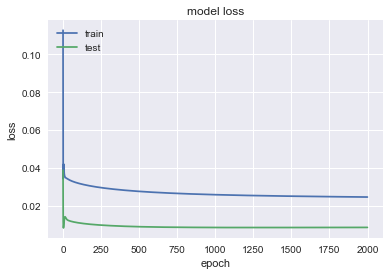

Test RMSE: 1773.163
R2_test: 0.050
Train RMSE: 3010.635
R2_train: 0.397
Test RMSE: 1773.162
R2_test: 0.996
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             15600     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 35,851
Trainable params: 35,851
Non-trainable params: 0
_________________________________

Epoch 108/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0267 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0267 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0266 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0266 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 178us/step - loss: 0.0266 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0266 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 114/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 

Epoch 166/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 167/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 168/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 169/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 170/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 171/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 172/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 

Epoch 281/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 282/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 283/2000
104/104 [==============================] - 0s 178us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 284/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 285/2000
104/104 [==============================] - 0s 188us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 286/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 287/2000
104/104 [==============================] - 0s 178us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 

Epoch 339/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 340/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 341/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 342/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 343/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 344/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 345/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 

Epoch 397/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0239 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 398/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0239 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0239 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 400/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0239 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 401/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0239 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 402/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0239 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 403/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0239 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 

Epoch 455/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0237 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 456/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0237 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 457/2000
104/104 [==============================] - 0s 227us/step - loss: 0.0237 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 458/2000
104/104 [==============================] - 0s 246us/step - loss: 0.0237 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 459/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0237 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 460/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0237 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 461/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0236 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 

Epoch 513/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 514/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 515/2000
104/104 [==============================] - 0s 188us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 516/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 517/2000
104/104 [==============================] - 0s 251us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 518/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 519/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 

Epoch 628/2000
104/104 [==============================] - 0s 270us/step - loss: 0.0231 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 629/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0231 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 630/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0230 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 631/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0230 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 632/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0230 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 633/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0230 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 634/2000
104/104 [==============================] - 0s 188us/step - loss: 0.0230 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 

Epoch 686/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 687/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 688/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 689/2000
104/104 [==============================] - 0s 178us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 690/2000
104/104 [==============================] - 0s 188us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 691/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 692/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 

Epoch 800/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 801/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 802/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 803/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 804/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 805/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 806/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 154us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 915/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 916/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 917/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 918/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 919/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 920/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 921/2000
104/10

Epoch 972/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 973/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 974/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 975/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 976/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 977/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 978/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 212us/step - loss: 0.0219 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1086/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0219 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1087/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0219 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1088/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0219 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1089/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0219 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1090/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0219 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1091/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0219 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1092/2000

Epoch 1142/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1143/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1144/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1145/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1146/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1147/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1148/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 149us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1200/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1201/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1202/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1203/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1204/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1205/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1206/2000

104/104 [==============================] - 0s 164us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1312/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1313/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1314/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1315/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1316/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1317/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1318/2000

Epoch 1368/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1369/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1370/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1371/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1372/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1373/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1374/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0213 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 145us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1483/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1484/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1485/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1486/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1487/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1488/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1489/2000

104/104 [==============================] - 0s 145us/step - loss: 0.0210 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 1597/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0210 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 1598/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0210 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 1599/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0210 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 1600/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0210 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 1601/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0210 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 1602/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0210 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 1603/2000

Epoch 1710/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1711/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1712/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1713/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1714/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1715/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1716/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 154us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1825/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1826/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1827/2000
104/104 [==============================] - 0s 236us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1828/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1829/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1830/2000
104/104 [==============================] - 0s 270us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1831/2000

Epoch 1881/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1882/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1883/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1884/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1885/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1886/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1887/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 164us/step - loss: 0.0204 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1996/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0204 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1997/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0204 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1998/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0204 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1999/2000
104/104 [==============================] - 0s 150us/step - loss: 0.0204 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 2000/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0204 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00


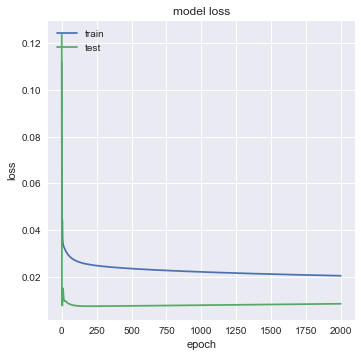

Test RMSE: 1764.175
R2_test: 0.059
Train RMSE: 2745.204
R2_train: 0.498
Test RMSE: 1764.174
R2_test: 0.996
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 100)            51200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 131,701
Trainable params: 131,701
Non-trainable params: 0
_______________________________

104/104 [==============================] - 0s 217us/step - loss: 0.0362 - acc: 0.0096 - val_loss: 0.0142 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0362 - acc: 0.0096 - val_loss: 0.0142 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - ETA: 0s - loss: 0.0275 - acc: 0.020 - 0s 212us/step - loss: 0.0362 - acc: 0.0096 - val_loss: 0.0142 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0362 - acc: 0.0096 - val_loss: 0.0142 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0361 - acc: 0.0096 - val_loss: 0.0142 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0361 - acc: 0.0096 - val_loss: 0.0142 - val_acc: 0.0000e+00
Epoch 114/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0361 - acc: 0.0096 - val_loss: 0.0142 - val

Epoch 223/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0343 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 224/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0342 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 227us/step - loss: 0.0342 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0342 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0342 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 228/2000
104/104 [==============================] - 0s 318us/step - loss: 0.0342 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 229/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0342 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 

Epoch 281/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0121 - val_acc: 0.0000e+00
Epoch 282/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0121 - val_acc: 0.0000e+00
Epoch 283/2000
104/104 [==============================] - 0s 277us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0121 - val_acc: 0.0000e+00
Epoch 284/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0121 - val_acc: 0.0000e+00
Epoch 285/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0333 - acc: 0.0096 - val_loss: 0.0121 - val_acc: 0.0000e+00
Epoch 286/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0333 - acc: 0.0096 - val_loss: 0.0121 - val_acc: 0.0000e+00
Epoch 287/2000
104/104 [==============================] - 0s 284us/step - loss: 0.0333 - acc: 0.0096 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 

Epoch 339/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0326 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 340/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0326 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 341/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0326 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 342/2000
104/104 [==============================] - 0s 221us/step - loss: 0.0325 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 343/2000
104/104 [==============================] - 0s 270us/step - loss: 0.0325 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 344/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0325 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 345/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0325 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 

Epoch 397/2000
104/104 [==============================] - 0s 264us/step - loss: 0.0318 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 398/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0318 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0318 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 400/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0318 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 401/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0318 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 402/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0318 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 403/2000
104/104 [==============================] - ETA: 0s - loss: 0.0219 - acc: 0.020 - 0s 222us/step - loss: 0.0317 - acc: 0.0096 - val_los

104/104 [==============================] - 0s 270us/step - loss: 0.0305 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 512/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0305 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 513/2000
104/104 [==============================] - 0s 243us/step - loss: 0.0304 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 514/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0304 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 515/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0304 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 516/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0304 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 517/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0304 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 518/2000
104/10

104/104 [==============================] - 0s 280us/step - loss: 0.0293 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 626/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0293 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 627/2000
104/104 [==============================] - 0s 236us/step - loss: 0.0293 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 628/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0293 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 629/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0293 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 630/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0293 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 631/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0293 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 632/2000
104/10

Epoch 740/2000
104/104 [==============================] - 0s 299us/step - loss: 0.0283 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 741/2000
104/104 [==============================] - 0s 265us/step - loss: 0.0283 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 742/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0283 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 743/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0283 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 744/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0283 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 745/2000
104/104 [==============================] - 0s 227us/step - loss: 0.0283 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 746/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0283 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 241us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 855/2000
104/104 [==============================] - 0s 270us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 856/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 857/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 858/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 859/2000
104/104 [==============================] - 0s 227us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 860/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 861/2000
104/10

Epoch 912/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 913/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 914/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 915/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 916/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 917/2000
104/104 [==============================] - 0s 251us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 918/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 

Epoch 970/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 971/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 972/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 973/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 974/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 975/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 976/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 212us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1085/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1086/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1087/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1088/2000
104/104 [==============================] - 0s 280us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1089/2000
104/104 [==============================] - 0s 236us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1090/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1091/2000

104/104 [==============================] - 0s 203us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1199/2000
104/104 [==============================] - 0s 299us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1200/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1201/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1202/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1203/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1204/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1205/2000

104/104 [==============================] - 0s 193us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1313/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1314/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1315/2000
104/104 [==============================] - 0s 328us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1316/2000
104/104 [==============================] - 0s 289us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1317/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1318/2000
104/104 [==============================] - 0s 270us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1319/2000

104/104 [==============================] - 0s 236us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1427/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1428/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1429/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1430/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1431/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1432/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1433/2000

104/104 [==============================] - 0s 212us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1541/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1542/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1543/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1544/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1545/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1546/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1547/2000

104/104 [==============================] - 0s 212us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1655/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1656/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1657/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1658/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1659/2000
104/104 [==============================] - 0s 337us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1660/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1661/2000

104/104 [==============================] - 0s 212us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1769/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1770/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1771/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1772/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1773/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1774/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1775/2000

104/104 [==============================] - 0s 203us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1883/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1884/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1885/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1886/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1887/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1888/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1889/2000

Epoch 1996/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1997/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1998/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1999/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 2000/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00


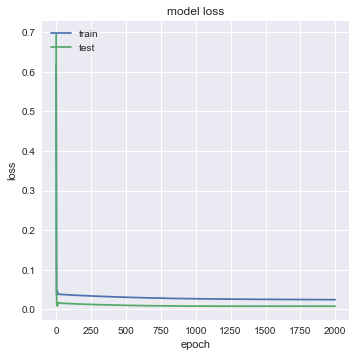

Test RMSE: 1714.150
R2_test: 0.112
Train RMSE: 3000.160
R2_train: 0.401
Test RMSE: 1714.150
R2_test: 0.996
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 5)              660       
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 886
Trainable params: 886
Non-trainable params: 0
_______________________________________

104/104 [==============================] - 0s 135us/step - loss: 0.0370 - acc: 0.0096 - val_loss: 0.0143 - val_acc: 0.0000e+00
Epoch 108/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0370 - acc: 0.0096 - val_loss: 0.0143 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0370 - acc: 0.0096 - val_loss: 0.0143 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - ETA: 0s - loss: 0.0290 - acc: 0.020 - 0s 125us/step - loss: 0.0370 - acc: 0.0096 - val_loss: 0.0143 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0370 - acc: 0.0096 - val_loss: 0.0143 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0369 - acc: 0.0096 - val_loss: 0.0143 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0369 - acc: 0.0096 - val_loss: 0.0143 - val

104/104 [==============================] - 0s 126us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0135 - val_acc: 0.0000e+00
Epoch 222/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0135 - val_acc: 0.0000e+00
Epoch 223/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0135 - val_acc: 0.0000e+00
Epoch 224/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0135 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0135 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0135 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0135 - val_acc: 0.0000e+00
Epoch 228/2000
104/10

Epoch 279/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0355 - acc: 0.0096 - val_loss: 0.0132 - val_acc: 0.0000e+00
Epoch 280/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0355 - acc: 0.0096 - val_loss: 0.0132 - val_acc: 0.0000e+00
Epoch 281/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0355 - acc: 0.0096 - val_loss: 0.0132 - val_acc: 0.0000e+00
Epoch 282/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0355 - acc: 0.0096 - val_loss: 0.0132 - val_acc: 0.0000e+00
Epoch 283/2000
104/104 [==============================] - 0s 116us/step - loss: 0.0355 - acc: 0.0096 - val_loss: 0.0132 - val_acc: 0.0000e+00
Epoch 284/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0355 - acc: 0.0096 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 285/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0355 - acc: 0.0096 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 

Epoch 337/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0352 - acc: 0.0096 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 338/2000
104/104 [==============================] - 0s 128us/step - loss: 0.0352 - acc: 0.0096 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 339/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0352 - acc: 0.0096 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 340/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0352 - acc: 0.0096 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 341/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0352 - acc: 0.0096 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 342/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0352 - acc: 0.0096 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 343/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0352 - acc: 0.0096 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 

Epoch 394/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0349 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 395/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0349 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 396/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0349 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 397/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0349 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 398/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0349 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0349 - acc: 0.0096 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 400/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0349 - acc: 0.0096 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 

Epoch 452/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0346 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 453/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0346 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 454/2000
104/104 [==============================] - 0s 116us/step - loss: 0.0346 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 455/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0346 - acc: 0.0096 - val_loss: 0.0124 - val_acc: 0.0000e+00
Epoch 456/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0346 - acc: 0.0096 - val_loss: 0.0124 - val_acc: 0.0000e+00
Epoch 457/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0346 - acc: 0.0096 - val_loss: 0.0124 - val_acc: 0.0000e+00
Epoch 458/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0346 - acc: 0.0096 - val_loss: 0.0124 - val_acc: 0.0000e+00
Epoch 

Epoch 509/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0344 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 510/2000
104/104 [==============================] - 0s 141us/step - loss: 0.0344 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 511/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0344 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 512/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0344 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 513/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0344 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 514/2000
104/104 [==============================] - ETA: 0s - loss: 0.0256 - acc: 0.020 - 0s 125us/step - loss: 0.0344 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 515/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0344 - acc: 0.0096 - val_los

Epoch 623/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0340 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 624/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0340 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 625/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0340 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 626/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0340 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 627/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0339 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 628/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0339 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 629/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0339 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 135us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0117 - val_acc: 0.0000e+00
Epoch 738/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0117 - val_acc: 0.0000e+00
Epoch 739/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 740/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 741/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 742/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 743/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 744/2000
104/10

Epoch 794/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 795/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 796/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 797/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 798/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 799/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 800/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 

Epoch 852/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0333 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 853/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0333 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 854/2000
104/104 [==============================] - 0s 116us/step - loss: 0.0333 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 855/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0333 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 856/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0333 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 857/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0332 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 858/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0332 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 

Epoch 909/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0331 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 910/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0331 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 911/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0331 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 912/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0331 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 913/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0331 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 914/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0331 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 915/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0331 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 135us/step - loss: 0.0328 - acc: 0.0096 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1024/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0328 - acc: 0.0096 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1025/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0328 - acc: 0.0096 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1026/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0328 - acc: 0.0096 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1027/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0328 - acc: 0.0096 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1028/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0328 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 1029/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0328 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 1030/2000

Epoch 1137/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0326 - acc: 0.0096 - val_loss: 0.0109 - val_acc: 0.0000e+00
Epoch 1138/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0326 - acc: 0.0096 - val_loss: 0.0109 - val_acc: 0.0000e+00
Epoch 1139/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0326 - acc: 0.0096 - val_loss: 0.0109 - val_acc: 0.0000e+00
Epoch 1140/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0326 - acc: 0.0096 - val_loss: 0.0109 - val_acc: 0.0000e+00
Epoch 1141/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0326 - acc: 0.0096 - val_loss: 0.0109 - val_acc: 0.0000e+00
Epoch 1142/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0326 - acc: 0.0096 - val_loss: 0.0109 - val_acc: 0.0000e+00
Epoch 1143/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0326 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 154us/step - loss: 0.0323 - acc: 0.0096 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1252/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0323 - acc: 0.0096 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1253/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0323 - acc: 0.0096 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1254/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0323 - acc: 0.0096 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1255/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0323 - acc: 0.0096 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1256/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0323 - acc: 0.0096 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1257/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0323 - acc: 0.0096 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1258/2000

104/104 [==============================] - 0s 164us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1366/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1367/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1368/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1369/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1370/2000
104/104 [==============================] - ETA: 0s - loss: 0.0228 - acc: 0.020 - 0s 116us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1371/2000
104/104 [==============================] - 0s 116us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0105

104/104 [==============================] - 0s 125us/step - loss: 0.0319 - acc: 0.0096 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 1480/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0319 - acc: 0.0096 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 1481/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0319 - acc: 0.0096 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 1482/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0319 - acc: 0.0096 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 1483/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0319 - acc: 0.0096 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 1484/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0319 - acc: 0.0096 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 1485/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0319 - acc: 0.0096 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 1486/2000

104/104 [==============================] - 0s 135us/step - loss: 0.0317 - acc: 0.0096 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1594/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0317 - acc: 0.0096 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1595/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0317 - acc: 0.0096 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1596/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0317 - acc: 0.0096 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1597/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0317 - acc: 0.0096 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1598/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0317 - acc: 0.0096 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1599/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0317 - acc: 0.0096 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1600/2000

Epoch 1650/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1651/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1652/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1653/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1654/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1655/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1656/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 154us/step - loss: 0.0315 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1765/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0315 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1766/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0315 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1767/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0315 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1768/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0315 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1769/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0315 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1770/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0315 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1771/2000

104/104 [==============================] - 0s 164us/step - loss: 0.0313 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 1879/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0313 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 1880/2000
104/104 [==============================] - 0s 118us/step - loss: 0.0313 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 1881/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0313 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 1882/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0313 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 1883/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0313 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 1884/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0313 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 1885/2000

104/104 [==============================] - 0s 154us/step - loss: 0.0311 - acc: 0.0096 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1993/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0311 - acc: 0.0096 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1994/2000
104/104 [==============================] - 0s 121us/step - loss: 0.0311 - acc: 0.0096 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1995/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0311 - acc: 0.0096 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1996/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0311 - acc: 0.0096 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1997/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0311 - acc: 0.0096 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1998/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0311 - acc: 0.0096 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1999/2000

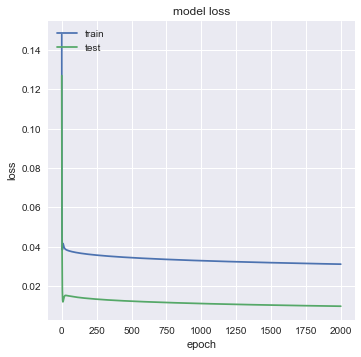

Test RMSE: 1896.087
R2_test: -0.086
Train RMSE: 3387.804
R2_train: 0.236
Test RMSE: 1896.087
R2_test: 0.995
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             15600     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 35,851
Trainable params: 35,851
Non-trainable params: 0
________________________________

Epoch 108/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0274 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0274 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 114/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0274 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 

Epoch 223/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 224/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 228/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 229/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 

Epoch 338/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 339/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 340/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 341/2000
104/104 [==============================] - 0s 144us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 342/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 343/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 344/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 

Epoch 396/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 397/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 398/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 400/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 401/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 402/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 164us/step - loss: 0.0236 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 511/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0236 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 512/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0236 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 513/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0236 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 514/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0236 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 515/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0236 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 516/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0236 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 517/2000
104/10

Epoch 568/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 569/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 570/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 571/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 572/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 573/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 574/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0233 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 154us/step - loss: 0.0230 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 683/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0230 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 684/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0230 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 685/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0230 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 686/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 687/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 688/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 689/2000
104/10

Epoch 797/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 798/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 799/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 800/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 801/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 802/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 803/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 

Epoch 855/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0224 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 856/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0224 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 857/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0224 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 858/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0224 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 859/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0224 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 860/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0224 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 861/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0224 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 154us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 970/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 971/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 972/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 973/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 974/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 975/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 976/2000
104/10

Epoch 1026/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0220 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1027/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0220 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1028/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0220 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1029/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0220 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1030/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0220 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1031/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0220 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1032/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0220 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00

Epoch 1140/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1141/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1142/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1143/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1144/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1145/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1146/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 164us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1255/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1256/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1257/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1258/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1259/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1260/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1261/2000

104/104 [==============================] - 0s 145us/step - loss: 0.0213 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1368/2000
104/104 [==============================] - 0s 188us/step - loss: 0.0213 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1369/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0213 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1370/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0213 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1371/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0213 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1372/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0213 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1373/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0213 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1374/2000

104/104 [==============================] - 0s 154us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1482/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1483/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1484/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1485/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1486/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1487/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1488/2000

104/104 [==============================] - 0s 164us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1596/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1597/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1598/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1599/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1600/2000
104/104 [==============================] - 0s 156us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1601/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1602/2000

104/104 [==============================] - 0s 154us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 1710/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 1711/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 1712/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 1713/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 1714/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 1715/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 1716/2000

104/104 [==============================] - 0s 222us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1823/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1824/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1825/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1826/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1827/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1828/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 1829/2000

104/104 [==============================] - 0s 135us/step - loss: 0.0204 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1937/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0204 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1938/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0204 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1939/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0204 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1940/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0204 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1941/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0204 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1942/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0204 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 1943/2000

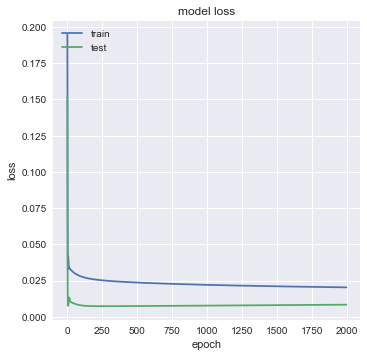

Test RMSE: 1760.317
R2_test: 0.063
Train RMSE: 2737.345
R2_train: 0.501
Test RMSE: 1760.317
R2_test: 0.996
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 100)            51200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 131,701
Trainable params: 131,701
Non-trainable params: 0
_______________________________

104/104 [==============================] - 0s 198us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0358 - acc: 0.0096 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0358 - acc: 0.0096 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0358 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0357 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 114/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0357 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 115/2000
104/10

Epoch 166/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0345 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 167/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0345 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 168/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0345 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 169/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0344 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 170/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0344 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 171/2000
104/104 [==============================] - 0s 227us/step - loss: 0.0344 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 172/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0344 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 

Epoch 224/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0333 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0333 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0333 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0333 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 228/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0333 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 229/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0333 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 230/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0332 - acc: 0.0096 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 

Epoch 282/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0323 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 283/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0323 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 284/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0323 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 285/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0323 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 286/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0323 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 287/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0322 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 288/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0322 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 

Epoch 340/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0314 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 341/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0314 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 342/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0314 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 343/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0314 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 344/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0313 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 345/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0313 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 346/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0313 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 

Epoch 398/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0306 - acc: 0.0096 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0306 - acc: 0.0096 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 400/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0306 - acc: 0.0096 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 401/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0305 - acc: 0.0096 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 402/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0305 - acc: 0.0096 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 403/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0305 - acc: 0.0096 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 404/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0305 - acc: 0.0096 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 

Epoch 513/2000
104/104 [==============================] - 0s 195us/step - loss: 0.0292 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 514/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0292 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 515/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0292 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 516/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0292 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 517/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0292 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 518/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0291 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 519/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0291 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 

Epoch 571/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 572/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 573/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 574/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 575/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 576/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 577/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 

Epoch 629/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0281 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 630/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0281 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 631/2000
104/104 [==============================] - 0s 251us/step - loss: 0.0281 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 632/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0281 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 633/2000
104/104 [==============================] - 0s 184us/step - loss: 0.0281 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 634/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0281 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 635/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0280 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 

Epoch 687/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 688/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 689/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 690/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 691/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 692/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 693/2000
104/104 [==============================] - 0s 189us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 

Epoch 745/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 746/2000
104/104 [==============================] - 0s 251us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 747/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 748/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 749/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 750/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 751/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 

Epoch 803/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 804/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 805/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 806/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 807/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 808/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 809/2000
104/104 [==============================] - 0s 188us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 

Epoch 861/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0266 - acc: 0.0096 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 862/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 863/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 864/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 865/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 866/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 867/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 

Epoch 919/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 920/2000
104/104 [==============================] - 0s 227us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 921/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 922/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 923/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 924/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 925/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 

Epoch 977/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 978/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 979/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 980/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 981/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 982/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 983/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 198us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1092/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1093/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1094/2000
104/104 [==============================] - 0s 226us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1095/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1096/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1097/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1098/2000

104/104 [==============================] - 0s 193us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1206/2000
104/104 [==============================] - 0s 196us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1207/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1208/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1209/2000
104/104 [==============================] - 0s 227us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1210/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1211/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1212/2000

104/104 [==============================] - 0s 202us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1320/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1321/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1322/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1323/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1324/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1325/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 1326/2000

104/104 [==============================] - 0s 212us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1434/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1435/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1436/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1437/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1438/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1439/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1440/2000

104/104 [==============================] - 0s 260us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1548/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1549/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1550/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1551/2000
104/104 [==============================] - 0s 221us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1552/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1553/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1554/2000

104/104 [==============================] - 0s 222us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1661/2000
104/104 [==============================] - 0s 270us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1662/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1663/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1664/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1665/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1666/2000
104/104 [==============================] - 0s 236us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 1667/2000

104/104 [==============================] - 0s 212us/step - loss: 0.0240 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1775/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0240 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1776/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0240 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1777/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0240 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1778/2000
104/104 [==============================] - 0s 236us/step - loss: 0.0240 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1779/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0240 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1780/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0240 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1781/2000

104/104 [==============================] - 0s 198us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1889/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1890/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1891/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1892/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1893/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1894/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1895/2000

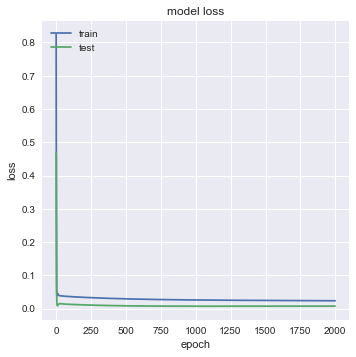

Test RMSE: 1654.115
R2_test: 0.173
Train RMSE: 2950.072
R2_train: 0.421
Test RMSE: 1654.114
R2_test: 0.996
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 5)              660       
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 886
Trainable params: 886
Non-trainable params: 0
_______________________________________

104/104 [==============================] - 0s 135us/step - loss: 0.0322 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0322 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0322 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 114/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 115/2000
104/10

Epoch 166/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0310 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 167/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0309 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 168/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0309 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 169/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0309 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 170/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0309 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 171/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0309 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 172/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0308 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - ETA: 0s - loss: 0.0196 - acc: 0.020 - 0s 125us/step - loss: 0.0295 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 281/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0295 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 282/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 283/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 284/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 285/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 286/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0084 - val

104/104 [==============================] - 0s 145us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 395/2000
104/104 [==============================] - 0s 121us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 396/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 397/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 398/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 400/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 401/2000
104/10

Epoch 508/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0279 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 509/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0279 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 510/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0279 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 511/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0279 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 512/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0279 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 513/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0279 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 514/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0279 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 

Epoch 566/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0277 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 567/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0277 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 568/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0277 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 569/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0277 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 570/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 571/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 572/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 135us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 681/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 682/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 683/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 684/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 685/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 686/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 687/2000
104/10

104/104 [==============================] - 0s 164us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 795/2000
104/104 [==============================] - ETA: 0s - loss: 0.0173 - acc: 0.020 - 0s 154us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 796/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 797/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0269 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 798/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 799/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 800/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0076 - val

Epoch 909/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0266 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 910/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0266 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 911/2000
104/104 [==============================] - ETA: 0s - loss: 0.0171 - acc: 0.020 - 0s 125us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 912/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 913/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 914/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 915/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0265 - acc: 0.0096 - val_los

104/104 [==============================] - 0s 116us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1024/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1025/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1026/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1027/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1028/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1029/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1030/2000

104/104 [==============================] - 0s 125us/step - loss: 0.0261 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1138/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0261 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1139/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0261 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1140/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0261 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1141/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0261 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1142/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0261 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1143/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1144/2000

104/104 [==============================] - 0s 140us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1251/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1252/2000
104/104 [==============================] - ETA: 0s - loss: 0.0166 - acc: 0.020 - 0s 135us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1253/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1254/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1255/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1256/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0075

Epoch 1364/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1365/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1366/2000
104/104 [==============================] - 0s 116us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1367/2000
104/104 [==============================] - 0s 121us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1368/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1369/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1370/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 125us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1479/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1480/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1481/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1482/2000
104/104 [==============================] - 0s 160us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1483/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1484/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1485/2000

104/104 [==============================] - 0s 135us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1593/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1594/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1595/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1596/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1597/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1598/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1599/2000

Epoch 1649/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1650/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1651/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1652/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1653/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1654/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1655/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00

Epoch 1763/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1764/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1765/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1766/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1767/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1768/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1769/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 125us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1821/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1822/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1823/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1824/2000
104/104 [==============================] - ETA: 0s - loss: 0.0161 - acc: 0.020 - 0s 125us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1825/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1826/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0074

Epoch 1877/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1878/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1879/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1880/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1881/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0249 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1882/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0249 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1883/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0249 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 121us/step - loss: 0.0249 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1935/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0249 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1936/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0249 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1937/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0249 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1938/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0249 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1939/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0249 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1940/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0249 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 1941/2000

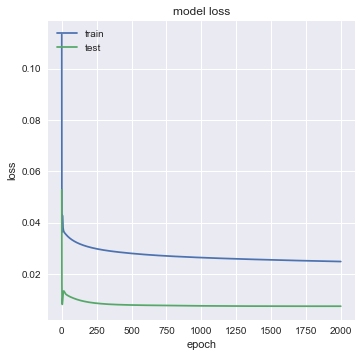

Test RMSE: 1651.696
R2_test: 0.175
Train RMSE: 3024.600
R2_train: 0.391
Test RMSE: 1651.695
R2_test: 0.996
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             15600     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 35,851
Trainable params: 35,851
Non-trainable params: 0
_________________________________

104/104 [==============================] - 0s 145us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 108/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - ETA: 0s - loss: 0.0159 - acc: 0.020 - 0s 164us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0079 - val

104/104 [==============================] - 0s 145us/step - loss: 0.0228 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 222/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0228 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 223/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0228 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 224/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0228 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0228 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0228 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0228 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 228/2000
104/10

Epoch 336/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 337/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 338/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 339/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 340/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 341/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 342/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 

Epoch 393/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0213 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 394/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0213 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 395/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0213 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 396/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0213 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 397/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0213 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 398/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0213 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0213 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 

Epoch 451/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 452/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 453/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 454/2000
104/104 [==============================] - 0s 178us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 455/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 456/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 457/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 145us/step - loss: 0.0202 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 566/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0202 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 567/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0202 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 568/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0202 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 569/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0202 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 570/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0202 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 571/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0202 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 572/2000
104/10

Epoch 623/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 624/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 625/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 626/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 627/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 628/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 629/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 

Epoch 681/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 682/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 683/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 684/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 685/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 686/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 687/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 

Epoch 739/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 740/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 741/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 742/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 743/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 744/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 745/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0193 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 

Epoch 854/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 855/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 856/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 857/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 858/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 859/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 860/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 149us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 969/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 970/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 971/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 972/2000
104/104 [==============================] - ETA: 0s - loss: 0.0112 - acc: 0.020 - 0s 164us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 973/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 974/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0100 - val

104/104 [==============================] - 0s 198us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1083/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1084/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1085/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1086/2000
104/104 [==============================] - 0s 188us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1087/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1088/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1089/2000

Epoch 1195/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1196/2000
104/104 [==============================] - 0s 136us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1197/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1198/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1199/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1200/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1201/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0105 - val_acc: 0.0000e+00

Epoch 1309/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0177 - acc: 0.0192 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1310/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0177 - acc: 0.0192 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1311/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0177 - acc: 0.0192 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1312/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0177 - acc: 0.0192 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1313/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0177 - acc: 0.0192 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1314/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0177 - acc: 0.0192 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1315/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0177 - acc: 0.0192 - val_loss: 0.0107 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 203us/step - loss: 0.0176 - acc: 0.0192 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 1367/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0176 - acc: 0.0192 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 1368/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0176 - acc: 0.0192 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 1369/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0176 - acc: 0.0192 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 1370/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0176 - acc: 0.0192 - val_loss: 0.0109 - val_acc: 0.0000e+00
Epoch 1371/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0176 - acc: 0.0192 - val_loss: 0.0109 - val_acc: 0.0000e+00
Epoch 1372/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0176 - acc: 0.0192 - val_loss: 0.0109 - val_acc: 0.0000e+00
Epoch 1373/2000

104/104 [==============================] - 0s 140us/step - loss: 0.0174 - acc: 0.0192 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1481/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0174 - acc: 0.0192 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1482/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0174 - acc: 0.0192 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1483/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0174 - acc: 0.0192 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1484/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0174 - acc: 0.0192 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1485/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0174 - acc: 0.0192 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1486/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0174 - acc: 0.0192 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1487/2000

104/104 [==============================] - 0s 140us/step - loss: 0.0172 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1594/2000
104/104 [==============================] - 0s 143us/step - loss: 0.0172 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1595/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0172 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1596/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0172 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1597/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0172 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1598/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0172 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1599/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0172 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1600/2000

104/104 [==============================] - 0s 154us/step - loss: 0.0170 - acc: 0.0192 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 1707/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0170 - acc: 0.0192 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 1708/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0170 - acc: 0.0192 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 1709/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0170 - acc: 0.0192 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 1710/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0170 - acc: 0.0192 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 1711/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0170 - acc: 0.0192 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 1712/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0170 - acc: 0.0192 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 1713/2000

Epoch 1763/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0170 - acc: 0.0192 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 1764/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0170 - acc: 0.0192 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 1765/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0170 - acc: 0.0192 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 1766/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0170 - acc: 0.0192 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 1767/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0170 - acc: 0.0192 - val_loss: 0.0117 - val_acc: 0.0000e+00
Epoch 1768/2000
104/104 [==============================] - ETA: 0s - loss: 0.0102 - acc: 0.020 - 0s 145us/step - loss: 0.0170 - acc: 0.0192 - val_loss: 0.0117 - val_acc: 0.0000e+00
Epoch 1769/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0170 - acc: 0.0192 - 

Epoch 1820/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0169 - acc: 0.0192 - val_loss: 0.0117 - val_acc: 0.0000e+00
Epoch 1821/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0169 - acc: 0.0192 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 1822/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0169 - acc: 0.0192 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 1823/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0169 - acc: 0.0192 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 1824/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0169 - acc: 0.0192 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 1825/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0169 - acc: 0.0192 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 1826/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0169 - acc: 0.0192 - val_loss: 0.0118 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 145us/step - loss: 0.0168 - acc: 0.0192 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 1934/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0168 - acc: 0.0192 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 1935/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0168 - acc: 0.0192 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 1936/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0168 - acc: 0.0192 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 1937/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0168 - acc: 0.0192 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 1938/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0168 - acc: 0.0192 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 1939/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0167 - acc: 0.0192 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 1940/2000

Epoch 1990/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0167 - acc: 0.0192 - val_loss: 0.0121 - val_acc: 0.0000e+00
Epoch 1991/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0167 - acc: 0.0192 - val_loss: 0.0121 - val_acc: 0.0000e+00
Epoch 1992/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0167 - acc: 0.0192 - val_loss: 0.0121 - val_acc: 0.0000e+00
Epoch 1993/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0167 - acc: 0.0192 - val_loss: 0.0121 - val_acc: 0.0000e+00
Epoch 1994/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0167 - acc: 0.0192 - val_loss: 0.0121 - val_acc: 0.0000e+00
Epoch 1995/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0167 - acc: 0.0192 - val_loss: 0.0121 - val_acc: 0.0000e+00
Epoch 1996/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0167 - acc: 0.0192 - val_loss: 0.0121 - val_acc: 0.0000e+00

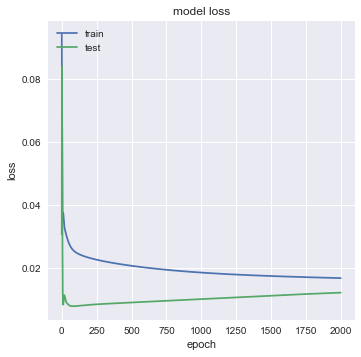

Test RMSE: 2109.660
R2_test: -0.344
Train RMSE: 2479.951
R2_train: 0.591
Test RMSE: 2109.659
R2_test: 0.994
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 100)            51200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 131,701
Trainable params: 131,701
Non-trainable params: 0
______________________________

104/104 [==============================] - 0s 193us/step - loss: 0.0369 - acc: 0.0096 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0369 - acc: 0.0096 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0369 - acc: 0.0096 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0368 - acc: 0.0096 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0368 - acc: 0.0096 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0368 - acc: 0.0096 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 114/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0368 - acc: 0.0096 - val_loss: 0.0148 - val_acc: 0.0000e+00
Epoch 115/2000
104/10

Epoch 166/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0143 - val_acc: 0.0000e+00
Epoch 167/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0143 - val_acc: 0.0000e+00
Epoch 168/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0142 - val_acc: 0.0000e+00
Epoch 169/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0142 - val_acc: 0.0000e+00
Epoch 170/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0142 - val_acc: 0.0000e+00
Epoch 171/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0142 - val_acc: 0.0000e+00
Epoch 172/2000
104/104 [==============================] - 0s 270us/step - loss: 0.0358 - acc: 0.0096 - val_loss: 0.0142 - val_acc: 0.0000e+00
Epoch 

Epoch 224/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0351 - acc: 0.0096 - val_loss: 0.0137 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0351 - acc: 0.0096 - val_loss: 0.0137 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0351 - acc: 0.0096 - val_loss: 0.0137 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0350 - acc: 0.0096 - val_loss: 0.0137 - val_acc: 0.0000e+00
Epoch 228/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0350 - acc: 0.0096 - val_loss: 0.0136 - val_acc: 0.0000e+00
Epoch 229/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0350 - acc: 0.0096 - val_loss: 0.0136 - val_acc: 0.0000e+00
Epoch 230/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0350 - acc: 0.0096 - val_loss: 0.0136 - val_acc: 0.0000e+00
Epoch 

Epoch 282/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0343 - acc: 0.0096 - val_loss: 0.0132 - val_acc: 0.0000e+00
Epoch 283/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0343 - acc: 0.0096 - val_loss: 0.0132 - val_acc: 0.0000e+00
Epoch 284/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0343 - acc: 0.0096 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 285/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0343 - acc: 0.0096 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 286/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0343 - acc: 0.0096 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 287/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0343 - acc: 0.0096 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 288/2000
104/104 [==============================] - 0s 227us/step - loss: 0.0342 - acc: 0.0096 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 

Epoch 340/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 341/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 342/2000
104/104 [==============================] - 0s 227us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 343/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 344/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0335 - acc: 0.0096 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 345/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0335 - acc: 0.0096 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 346/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0335 - acc: 0.0096 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 

Epoch 398/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0329 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0329 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 400/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0329 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 401/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0329 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 402/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0329 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 403/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0328 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 404/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0328 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 

Epoch 456/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0322 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 457/2000
104/104 [==============================] - 0s 214us/step - loss: 0.0322 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 458/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0322 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 459/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0322 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 460/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0322 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 461/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0322 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 462/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0322 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 

Epoch 514/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 515/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 516/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 517/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 518/2000
104/104 [==============================] - 0s 251us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 519/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 520/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0316 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 

Epoch 572/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0310 - acc: 0.0096 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 573/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0310 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 574/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0310 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 575/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0310 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 576/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0310 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 577/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0310 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 578/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0310 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 

Epoch 630/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0305 - acc: 0.0096 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 631/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0305 - acc: 0.0096 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 632/2000
104/104 [==============================] - 0s 270us/step - loss: 0.0304 - acc: 0.0096 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 633/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0304 - acc: 0.0096 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 634/2000
104/104 [==============================] - 0s 227us/step - loss: 0.0304 - acc: 0.0096 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 635/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0304 - acc: 0.0096 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 636/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0304 - acc: 0.0096 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 

Epoch 688/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0299 - acc: 0.0096 - val_loss: 0.0104 - val_acc: 0.0000e+00
Epoch 689/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0299 - acc: 0.0096 - val_loss: 0.0104 - val_acc: 0.0000e+00
Epoch 690/2000
104/104 [==============================] - 0s 251us/step - loss: 0.0299 - acc: 0.0096 - val_loss: 0.0104 - val_acc: 0.0000e+00
Epoch 691/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0299 - acc: 0.0096 - val_loss: 0.0104 - val_acc: 0.0000e+00
Epoch 692/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0299 - acc: 0.0096 - val_loss: 0.0104 - val_acc: 0.0000e+00
Epoch 693/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0299 - acc: 0.0096 - val_loss: 0.0104 - val_acc: 0.0000e+00
Epoch 694/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0299 - acc: 0.0096 - val_loss: 0.0104 - val_acc: 0.0000e+00
Epoch 

Epoch 746/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 747/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 748/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 749/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 750/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 751/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 752/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 222us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 861/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 862/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 863/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 864/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 865/2000
104/104 [==============================] - 0s 309us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 866/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 867/2000
104/10

Epoch 918/2000
104/104 [==============================] - 0s 213us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 919/2000
104/104 [==============================] - 0s 150us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 920/2000
104/104 [==============================] - 0s 301us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 921/2000
104/104 [==============================] - 0s 150us/step - loss: 0.0281 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 922/2000
104/104 [==============================] - 0s 150us/step - loss: 0.0281 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 923/2000
104/104 [==============================] - 0s 213us/step - loss: 0.0281 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 924/2000
104/104 [==============================] - 0s 301us/step - loss: 0.0281 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 

Epoch 976/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0278 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 977/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0278 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 978/2000
104/104 [==============================] - 0s 256us/step - loss: 0.0278 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 979/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0278 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 980/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0278 - acc: 0.0096 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 981/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0278 - acc: 0.0096 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 982/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0278 - acc: 0.0096 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 217us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1091/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1092/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1093/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1094/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0271 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1095/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0271 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1096/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0271 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1097/2000

104/104 [==============================] - 0s 217us/step - loss: 0.0266 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 1205/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0266 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 1206/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0266 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 1207/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0266 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 1208/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0266 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 1209/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0266 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 1210/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0266 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 1211/2000

104/104 [==============================] - 0s 202us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1319/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1320/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1321/2000
104/104 [==============================] - 0s 188us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1322/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1323/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1324/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0262 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1325/2000

104/104 [==============================] - 0s 203us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1433/2000
104/104 [==============================] - 0s 280us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1434/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1435/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1436/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1437/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1438/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1439/2000

104/104 [==============================] - 0s 217us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1547/2000
104/104 [==============================] - 0s 299us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1548/2000
104/104 [==============================] - 0s 280us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1549/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0254 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1550/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0254 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1551/2000
104/104 [==============================] - 0s 251us/step - loss: 0.0254 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1552/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0254 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1553/2000

104/104 [==============================] - 0s 212us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1661/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1662/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1663/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1664/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1665/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1666/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1667/2000

104/104 [==============================] - 0s 193us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1775/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1776/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1777/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1778/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1779/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1780/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1781/2000

104/104 [==============================] - 0s 202us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1889/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1890/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1891/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1892/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1893/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1894/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 1895/2000

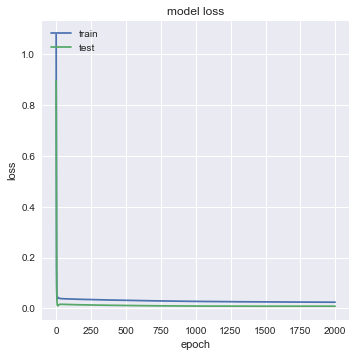

Test RMSE: 1793.984
R2_test: 0.027
Train RMSE: 3001.393
R2_train: 0.401
Test RMSE: 1793.986
R2_test: 0.996
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 5)              660       
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 886
Trainable params: 886
Non-trainable params: 0
_______________________________________

104/104 [==============================] - 0s 125us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 114/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 115/2000
104/10

Epoch 166/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 167/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 168/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 169/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 170/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0247 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 171/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0247 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 172/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0247 - acc: 0.0096 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 

Epoch 224/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0241 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 121us/step - loss: 0.0241 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0241 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0241 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 228/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0241 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 229/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0241 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 230/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0241 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 140us/step - loss: 0.0234 - acc: 0.0096 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 339/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0234 - acc: 0.0096 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 340/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0234 - acc: 0.0096 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 341/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0233 - acc: 0.0096 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 342/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0233 - acc: 0.0096 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 343/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0233 - acc: 0.0096 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 344/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0233 - acc: 0.0096 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 345/2000
104/10

104/104 [==============================] - 0s 145us/step - loss: 0.0229 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 453/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0229 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 454/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0229 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 455/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0229 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 456/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0229 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 457/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0229 - acc: 0.0096 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 458/2000
104/104 [==============================] - ETA: 0s - loss: 0.0152 - acc: 0.020 - 0s 154us/step - loss: 0.0229 - acc: 0.0096 - val_loss: 0.0111 - val

Epoch 509/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0227 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 510/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0227 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 511/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0227 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 512/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0227 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 513/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0227 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 514/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0227 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 515/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0227 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 140us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 624/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 625/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 626/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 627/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 628/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 629/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0117 - val_acc: 0.0000e+00
Epoch 630/2000
104/10

104/104 [==============================] - 0s 135us/step - loss: 0.0222 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 738/2000
104/104 [==============================] - ETA: 0s - loss: 0.0146 - acc: 0.020 - 0s 125us/step - loss: 0.0222 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 739/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0222 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 740/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0222 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 741/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0222 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 742/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0222 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 743/2000
104/104 [==============================] - 0s 400us/step - loss: 0.0222 - acc: 0.0096 - val_loss: 0.0119 - val

Epoch 852/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0220 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 853/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0220 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 854/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0220 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 855/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0220 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 856/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0220 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 857/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0220 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 858/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0220 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 

Epoch 910/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0219 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 911/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0219 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 912/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0219 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 913/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0219 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 914/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0219 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 915/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0219 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 916/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0219 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 125us/step - loss: 0.0217 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 1025/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0217 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 1026/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0217 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 1027/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0217 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 1028/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0217 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 1029/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0217 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 1030/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0217 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 1031/2000

104/104 [==============================] - 0s 125us/step - loss: 0.0215 - acc: 0.0096 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 1139/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0215 - acc: 0.0096 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 1140/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0215 - acc: 0.0096 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 1141/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0215 - acc: 0.0096 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 1142/2000
104/104 [==============================] - ETA: 0s - loss: 0.0140 - acc: 0.020 - 0s 125us/step - loss: 0.0215 - acc: 0.0096 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 1143/2000
104/104 [==============================] - 0s 116us/step - loss: 0.0215 - acc: 0.0096 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 1144/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0215 - acc: 0.0096 - val_loss: 0.0126

104/104 [==============================] - 0s 140us/step - loss: 0.0214 - acc: 0.0096 - val_loss: 0.0128 - val_acc: 0.0000e+00
Epoch 1253/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0214 - acc: 0.0096 - val_loss: 0.0128 - val_acc: 0.0000e+00
Epoch 1254/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0214 - acc: 0.0096 - val_loss: 0.0128 - val_acc: 0.0000e+00
Epoch 1255/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0214 - acc: 0.0096 - val_loss: 0.0128 - val_acc: 0.0000e+00
Epoch 1256/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0214 - acc: 0.0096 - val_loss: 0.0128 - val_acc: 0.0000e+00
Epoch 1257/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0214 - acc: 0.0096 - val_loss: 0.0128 - val_acc: 0.0000e+00
Epoch 1258/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0214 - acc: 0.0096 - val_loss: 0.0128 - val_acc: 0.0000e+00
Epoch 1259/2000

104/104 [==============================] - 0s 125us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 1366/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 1367/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 1368/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 1369/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0130 - val_acc: 0.0000e+00
Epoch 1370/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0130 - val_acc: 0.0000e+00
Epoch 1371/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0130 - val_acc: 0.0000e+00
Epoch 1372/2000

Epoch 1479/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 1480/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 1481/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 1482/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 1483/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 1484/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 1485/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0131 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 135us/step - loss: 0.0210 - acc: 0.0192 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 1537/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0210 - acc: 0.0192 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 1538/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0210 - acc: 0.0192 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 1539/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0210 - acc: 0.0192 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 1540/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0210 - acc: 0.0192 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 1541/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0210 - acc: 0.0192 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 1542/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0210 - acc: 0.0192 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 1543/2000

104/104 [==============================] - 0s 145us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0132 - val_acc: 0.0000e+00
Epoch 1651/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0132 - val_acc: 0.0000e+00
Epoch 1652/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0133 - val_acc: 0.0000e+00
Epoch 1653/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0133 - val_acc: 0.0000e+00
Epoch 1654/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0133 - val_acc: 0.0000e+00
Epoch 1655/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0133 - val_acc: 0.0000e+00
Epoch 1656/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0133 - val_acc: 0.0000e+00
Epoch 1657/2000

104/104 [==============================] - 0s 135us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0133 - val_acc: 0.0000e+00
Epoch 1765/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0133 - val_acc: 0.0000e+00
Epoch 1766/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0133 - val_acc: 0.0000e+00
Epoch 1767/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0133 - val_acc: 0.0000e+00
Epoch 1768/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0133 - val_acc: 0.0000e+00
Epoch 1769/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0133 - val_acc: 0.0000e+00
Epoch 1770/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0133 - val_acc: 0.0000e+00
Epoch 1771/2000

Epoch 1821/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0134 - val_acc: 0.0000e+00
Epoch 1822/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0134 - val_acc: 0.0000e+00
Epoch 1823/2000
104/104 [==============================] - ETA: 0s - loss: 0.0133 - acc: 0.020 - 0s 125us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0134 - val_acc: 0.0000e+00
Epoch 1824/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0134 - val_acc: 0.0000e+00
Epoch 1825/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0134 - val_acc: 0.0000e+00
Epoch 1826/2000
104/104 [==============================] - 0s 146us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0134 - val_acc: 0.0000e+00
Epoch 1827/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0207 - acc: 0.0192 - 

Epoch 1934/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0135 - val_acc: 0.0000e+00
Epoch 1935/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0135 - val_acc: 0.0000e+00
Epoch 1936/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0135 - val_acc: 0.0000e+00
Epoch 1937/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0135 - val_acc: 0.0000e+00
Epoch 1938/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0135 - val_acc: 0.0000e+00
Epoch 1939/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0135 - val_acc: 0.0000e+00
Epoch 1940/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0135 - val_acc: 0.0000e+00

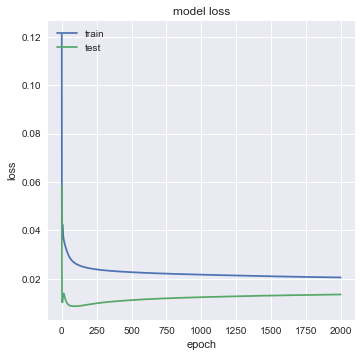

Test RMSE: 2234.819
R2_test: -0.508
Train RMSE: 2754.479
R2_train: 0.495
Test RMSE: 2234.820
R2_test: 0.994
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             15600     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 35,851
Trainable params: 35,851
Non-trainable params: 0
________________________________

104/104 [==============================] - 0s 174us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - ETA: 0s - loss: 0.0162 - acc: 0.020 - 0s 202us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 114/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0076 - val

104/104 [==============================] - 0s 154us/step - loss: 0.0235 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 223/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0235 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 224/2000
104/104 [==============================] - 0s 146us/step - loss: 0.0235 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0235 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0235 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0235 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 228/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 229/2000
104/10

Epoch 336/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 337/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 338/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 339/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 340/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 341/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 342/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 

Epoch 451/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 452/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 453/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 454/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 455/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 456/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 457/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 

Epoch 509/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 510/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 511/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 512/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 513/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 514/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 515/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0215 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 

Epoch 567/2000
104/104 [==============================] - 0s 136us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 568/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 569/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 570/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 571/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 572/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 573/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 

Epoch 682/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 683/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 684/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 685/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 686/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 687/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 688/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0207 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 154us/step - loss: 0.0203 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 797/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0203 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 798/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0203 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 799/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0203 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 800/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0203 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 801/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0203 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 802/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0203 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 803/2000
104/10

104/104 [==============================] - 0s 164us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 911/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 912/2000
104/104 [==============================] - ETA: 0s - loss: 0.0121 - acc: 0.020 - 0s 154us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 913/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 914/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 915/2000
104/104 [==============================] - 0s 144us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 916/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0095 - val

Epoch 1024/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1025/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1026/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1027/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1028/2000
104/104 [==============================] - 0s 150us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1029/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1030/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 145us/step - loss: 0.0195 - acc: 0.0192 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 1082/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0195 - acc: 0.0192 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 1083/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0195 - acc: 0.0192 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 1084/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0195 - acc: 0.0192 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 1085/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 1086/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 1087/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 1088/2000

Epoch 1195/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0192 - acc: 0.0192 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1196/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0192 - acc: 0.0192 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1197/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0192 - acc: 0.0192 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1198/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0192 - acc: 0.0192 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1199/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0192 - acc: 0.0192 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1200/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0192 - acc: 0.0192 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1201/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0192 - acc: 0.0192 - val_loss: 0.0101 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 145us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 1310/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 1311/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 1312/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 1313/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 1314/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 1315/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 1316/2000

104/104 [==============================] - 0s 169us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1424/2000
104/104 [==============================] - 0s 151us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1425/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1426/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1427/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1428/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1429/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 1430/2000

104/104 [==============================] - 0s 164us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1538/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1539/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1540/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1541/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1542/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1543/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 1544/2000

Epoch 1594/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0184 - acc: 0.0192 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 1595/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0184 - acc: 0.0192 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 1596/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0184 - acc: 0.0192 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 1597/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0184 - acc: 0.0192 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 1598/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0184 - acc: 0.0192 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 1599/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0184 - acc: 0.0192 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 1600/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0184 - acc: 0.0192 - val_loss: 0.0108 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 159us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 1709/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 1710/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 1711/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 1712/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 1713/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 1714/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 1715/2000

Epoch 1765/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1766/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1767/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1768/2000
104/104 [==============================] - 0s 178us/step - loss: 0.0182 - acc: 0.0192 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1769/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0181 - acc: 0.0192 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1770/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0181 - acc: 0.0192 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 1771/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0181 - acc: 0.0192 - val_loss: 0.0111 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 145us/step - loss: 0.0180 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1880/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0180 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1881/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0180 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1882/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0180 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1883/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0180 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1884/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0180 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1885/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0180 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1886/2000

Epoch 1936/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1937/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1938/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1939/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1940/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 1941/2000
104/104 [==============================] - 0s 158us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 1942/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0114 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 154us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 1994/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 1995/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 1996/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 1997/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 1998/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 1999/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0179 - acc: 0.0192 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 2000/2000

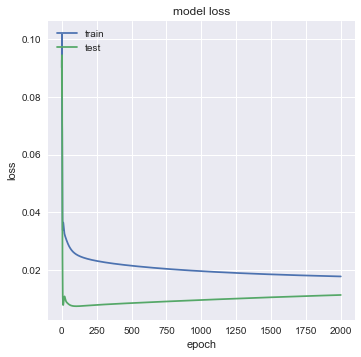

Test RMSE: 2053.606
R2_test: -0.274
Train RMSE: 2565.797
R2_train: 0.562
Test RMSE: 2053.605
R2_test: 0.995
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 100)            51200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 131,701
Trainable params: 131,701
Non-trainable params: 0
______________________________

104/104 [==============================] - 0s 202us/step - loss: 0.0312 - acc: 0.0096 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0311 - acc: 0.0096 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0311 - acc: 0.0096 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0311 - acc: 0.0096 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0310 - acc: 0.0096 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0310 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 114/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0309 - acc: 0.0096 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 115/2000
104/10

Epoch 166/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0290 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 167/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0290 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 168/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0290 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 169/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0289 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 170/2000
104/104 [==============================] - 0s 227us/step - loss: 0.0289 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 171/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0289 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 172/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0289 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 

Epoch 224/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 228/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0274 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 229/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0274 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 230/2000
104/104 [==============================] - 0s 236us/step - loss: 0.0274 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 

Epoch 282/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 283/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 284/2000
104/104 [==============================] - 0s 228us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 285/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 286/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 287/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 288/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 

Epoch 397/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 398/2000
104/104 [==============================] - 0s 208us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 400/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 401/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 402/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 403/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 

Epoch 455/2000
104/104 [==============================] - 0s 150us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 456/2000
104/104 [==============================] - 0s 150us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 457/2000
104/104 [==============================] - 0s 150us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 458/2000
104/104 [==============================] - 0s 48us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 459/2000
104/104 [==============================] - 0s 150us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 460/2000
104/104 [==============================] - 0s 301us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 461/2000
104/104 [==============================] - 0s 150us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 4

Epoch 513/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 514/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 515/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 516/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 517/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 518/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 519/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 

Epoch 571/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 572/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 573/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 574/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 575/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 576/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 577/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0237 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 

Epoch 629/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 630/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 631/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 632/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 633/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 634/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 635/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 

Epoch 687/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0231 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 688/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0231 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 689/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0231 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 690/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0231 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 691/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0231 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 692/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0231 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 693/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0231 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 

Epoch 745/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 746/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0228 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 747/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0228 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 748/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0228 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 749/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0228 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 750/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0228 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 751/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0228 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 

Epoch 860/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 861/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 862/2000
104/104 [==============================] - 0s 251us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 863/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 864/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 865/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 866/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 

Epoch 975/2000
104/104 [==============================] - 0s 256us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 976/2000
104/104 [==============================] - 0s 199us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 977/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 978/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 979/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 980/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 981/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 188us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1090/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1091/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1092/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1093/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1094/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1095/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 1096/2000

104/104 [==============================] - 0s 222us/step - loss: 0.0210 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 1204/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 1205/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 1206/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 1207/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 1208/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 1209/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 1210/2000

104/104 [==============================] - 0s 202us/step - loss: 0.0205 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1318/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0205 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1319/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0205 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1320/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0205 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1321/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0205 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1322/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0205 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1323/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0205 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1324/2000

104/104 [==============================] - 0s 193us/step - loss: 0.0202 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 1432/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0202 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 1433/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0202 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 1434/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0202 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 1435/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0202 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 1436/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0201 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 1437/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0201 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 1438/2000

Epoch 1488/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0200 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 1489/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0200 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 1490/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0200 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 1491/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0200 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 1492/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0200 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 1493/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0200 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 1494/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0200 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 222us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 1603/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 1604/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 1605/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 1606/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 1607/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 1608/2000
104/104 [==============================] - 0s 280us/step - loss: 0.0196 - acc: 0.0192 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 1609/2000

104/104 [==============================] - 0s 193us/step - loss: 0.0193 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1717/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0193 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1718/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0193 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1719/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0193 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1720/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0193 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1721/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0193 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1722/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0193 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1723/2000

104/104 [==============================] - 0s 212us/step - loss: 0.0190 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1831/2000
104/104 [==============================] - ETA: 0s - loss: 0.0117 - acc: 0.020 - 0s 222us/step - loss: 0.0190 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1832/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0190 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1833/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0190 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1834/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0190 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1835/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0190 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1836/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0190 - acc: 0.0192 - val_loss: 0.0100

104/104 [==============================] - 0s 202us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1945/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1946/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1947/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1948/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1949/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1950/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 1951/2000

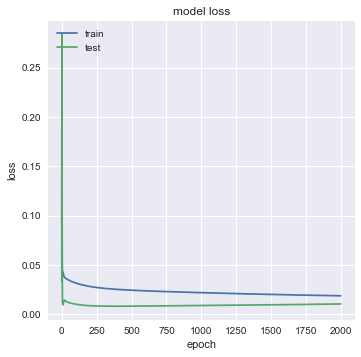

Test RMSE: 1946.610
R2_test: -0.144
Train RMSE: 2617.149
R2_train: 0.544
Test RMSE: 1946.610
R2_test: 0.995
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 5)              660       
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 886
Trainable params: 886
Non-trainable params: 0
______________________________________

104/104 [==============================] - 0s 145us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0106 - val_acc: 0.0000e+00
Epoch 108/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0106 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0106 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0106 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0106 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0106 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0284 - acc: 0.0096 - val_loss: 0.0106 - val_acc: 0.0000e+00
Epoch 114/2000
104/10

Epoch 222/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 223/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 224/2000
104/104 [==============================] - 0s 116us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 228/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 135us/step - loss: 0.0267 - acc: 0.0096 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 337/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0267 - acc: 0.0096 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 338/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0267 - acc: 0.0096 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 339/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0267 - acc: 0.0096 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 340/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0267 - acc: 0.0096 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 341/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0267 - acc: 0.0096 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 342/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0267 - acc: 0.0096 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 343/2000
104/10

Epoch 394/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 395/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 396/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 397/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 398/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 400/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 135us/step - loss: 0.0262 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 509/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0262 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 510/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0262 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 511/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0262 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 512/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0262 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 513/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0262 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 514/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0262 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 515/2000
104/10

Epoch 566/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0261 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 567/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0261 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 568/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0261 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 569/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0261 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 570/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0261 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 571/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0261 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 572/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0261 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 

Epoch 624/2000
104/104 [==============================] - 0s 150us/step - loss: 0.0260 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 625/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0260 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 626/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 627/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 628/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 629/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 630/2000
104/104 [==============================] - 0s 188us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 

Epoch 682/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 683/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 684/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 685/2000
104/104 [==============================] - 0s 142us/step - loss: 0.0259 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 686/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0258 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 687/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0258 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 688/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0258 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 

Epoch 740/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0258 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 741/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0258 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 742/2000
104/104 [==============================] - 0s 116us/step - loss: 0.0258 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 743/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0258 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 744/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0258 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 745/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0258 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 746/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0258 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 135us/step - loss: 0.0256 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 855/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0256 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 856/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0256 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 857/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0256 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 858/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0256 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 859/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0256 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 860/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0256 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 861/2000
104/10

Epoch 912/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 913/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 914/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 915/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 916/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 917/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 918/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 

Epoch 969/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 970/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 971/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 972/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 973/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 974/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 975/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0255 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 135us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1084/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1085/2000
104/104 [==============================] - ETA: 0s - loss: 0.0159 - acc: 0.020 - 0s 140us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1086/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1087/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1088/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1089/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0092

Epoch 1197/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1198/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1199/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1200/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1201/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1202/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1203/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0253 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 135us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1255/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1256/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1257/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1258/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1259/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1260/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1261/2000

Epoch 1311/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1312/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1313/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1314/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1315/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1316/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1317/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 125us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1426/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1427/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1428/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1429/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1430/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1431/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0251 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1432/2000

104/104 [==============================] - 0s 135us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1540/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1541/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1542/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1543/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1544/2000
104/104 [==============================] - ETA: 0s - loss: 0.0156 - acc: 0.020 - 0s 135us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1545/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0091

Epoch 1596/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1597/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1598/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1599/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1600/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1601/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1602/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00

Epoch 1710/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1711/2000
104/104 [==============================] - ETA: 0s - loss: 0.0155 - acc: 0.020 - 0s 145us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1712/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1713/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1714/2000
104/104 [==============================] - 0s 121us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1715/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1716/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0249 - acc: 0.0192 - 

104/104 [==============================] - 0s 145us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1824/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1825/2000
104/104 [==============================] - ETA: 0s - loss: 0.0154 - acc: 0.020 - 0s 154us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1826/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1827/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1828/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1829/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0091

Epoch 1937/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1938/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1939/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1940/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1941/2000
104/104 [==============================] - 0s 126us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1942/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 1943/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0091 - val_acc: 0.0000e+00

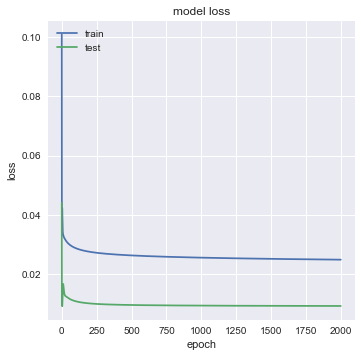

Test RMSE: 1832.103
R2_test: -0.014
Train RMSE: 3022.150
R2_train: 0.392
Test RMSE: 1832.101
R2_test: 0.996
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             15600     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 35,851
Trainable params: 35,851
Non-trainable params: 0
________________________________

104/104 [==============================] - 0s 154us/step - loss: 0.0291 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 108/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0291 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0290 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0290 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0290 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0289 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0289 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 114/2000
104/10

104/104 [==============================] - 0s 154us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 222/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 223/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 224/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 228/2000
104/10

104/104 [==============================] - 0s 154us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 336/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 337/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 338/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 339/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 340/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 341/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 342/2000
104/10

104/104 [==============================] - 0s 174us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 450/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 451/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 452/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0245 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 453/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 454/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 455/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 456/2000
104/10

Epoch 507/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 508/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 509/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 510/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 511/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 512/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 513/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 

Epoch 565/2000
104/104 [==============================] - 0s 147us/step - loss: 0.0239 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 566/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0239 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 567/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0239 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 568/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0239 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 569/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0239 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 570/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0239 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 571/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0239 - acc: 0.0192 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 

Epoch 680/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0235 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 681/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0235 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 682/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0235 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 683/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0235 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 684/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0235 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 685/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0235 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 686/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0235 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 

Epoch 795/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0232 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 796/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0232 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 797/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0232 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 798/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0232 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 799/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0232 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 800/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0232 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 801/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0232 - acc: 0.0192 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 154us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 910/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 911/2000
104/104 [==============================] - 0s 141us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 912/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 913/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 914/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 915/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0229 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 916/2000
104/10

Epoch 967/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0227 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 968/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0227 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 969/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0227 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 970/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0227 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 971/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0227 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 972/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0227 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 973/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0227 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 

Epoch 1081/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1082/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1083/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1084/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1085/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1086/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1087/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0225 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 164us/step - loss: 0.0224 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1139/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1140/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1141/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1142/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1143/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1144/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0223 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1145/2000

Epoch 1252/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1253/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1254/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1255/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1256/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1257/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1258/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 154us/step - loss: 0.0219 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1366/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0219 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1367/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0219 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1368/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0219 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1369/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0219 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1370/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0219 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1371/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0219 - acc: 0.0192 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1372/2000

104/104 [==============================] - 0s 164us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1480/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1481/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1482/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1483/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1484/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1485/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0217 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1486/2000

Epoch 1536/2000
104/104 [==============================] - 0s 178us/step - loss: 0.0216 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1537/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0216 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1538/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0216 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1539/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0216 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1540/2000
104/104 [==============================] - 0s 178us/step - loss: 0.0216 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1541/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0216 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1542/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0216 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 154us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1651/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1652/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1653/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1654/2000
104/104 [==============================] - 0s 153us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1655/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1656/2000
104/104 [==============================] - 0s 289us/step - loss: 0.0214 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1657/2000

104/104 [==============================] - 0s 154us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1764/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1765/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1766/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1767/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1768/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1769/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1770/2000

104/104 [==============================] - 0s 164us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1878/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1879/2000
104/104 [==============================] - 0s 162us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1880/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1881/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1882/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1883/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0211 - acc: 0.0192 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1884/2000

104/104 [==============================] - 0s 164us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1992/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1993/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1994/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1995/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1996/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1997/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0209 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1998/2000

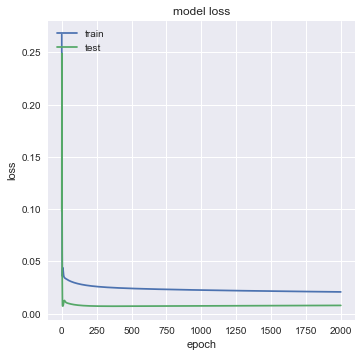

Test RMSE: 1716.031
R2_test: 0.110
Train RMSE: 2775.617
R2_train: 0.487
Test RMSE: 1716.031
R2_test: 0.996
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 100)            51200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 131,701
Trainable params: 131,701
Non-trainable params: 0
_______________________________

104/104 [==============================] - 0s 207us/step - loss: 0.0360 - acc: 0.0096 - val_loss: 0.0137 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0360 - acc: 0.0096 - val_loss: 0.0136 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0360 - acc: 0.0096 - val_loss: 0.0136 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0136 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0136 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0136 - val_acc: 0.0000e+00
Epoch 114/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0359 - acc: 0.0096 - val_loss: 0.0136 - val_acc: 0.0000e+00
Epoch 115/2000
104/10

Epoch 166/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0350 - acc: 0.0096 - val_loss: 0.0130 - val_acc: 0.0000e+00
Epoch 167/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0350 - acc: 0.0096 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 168/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0350 - acc: 0.0096 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 169/2000
104/104 [==============================] - 0s 256us/step - loss: 0.0350 - acc: 0.0096 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 170/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0350 - acc: 0.0096 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 171/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0350 - acc: 0.0096 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 172/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0349 - acc: 0.0096 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 

Epoch 224/2000
104/104 [==============================] - 0s 213us/step - loss: 0.0342 - acc: 0.0096 - val_loss: 0.0124 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0342 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0342 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0342 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 228/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0341 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 229/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0341 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 230/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0341 - acc: 0.0096 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 

Epoch 282/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 283/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 284/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 285/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 286/2000
104/104 [==============================] - 0s 236us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 287/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 288/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0334 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 

Epoch 340/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0327 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 341/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0327 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 342/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0327 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 343/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0327 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 344/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0327 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 345/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0327 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 346/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0327 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 

Epoch 398/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0109 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0109 - val_acc: 0.0000e+00
Epoch 400/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 401/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 402/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0321 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 403/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0320 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 404/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0320 - acc: 0.0096 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 

Epoch 513/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0309 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 514/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0309 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 515/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0309 - acc: 0.0096 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 516/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0309 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 517/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0309 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 518/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0309 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 519/2000
104/104 [==============================] - 0s 257us/step - loss: 0.0309 - acc: 0.0096 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 

Epoch 628/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0299 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 629/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0299 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 630/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0299 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 631/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0299 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 632/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0299 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 633/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0299 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 634/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0298 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 

Epoch 686/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 687/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 688/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 689/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 690/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 691/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 692/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 

Epoch 744/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0290 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 745/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0290 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 746/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0290 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 747/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0290 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 748/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0290 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 749/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0290 - acc: 0.0096 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 750/2000
104/104 [==============================] - 0s 280us/step - loss: 0.0289 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 

Epoch 802/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 803/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 804/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 805/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 806/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 807/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0286 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 808/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 

Epoch 860/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 861/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 862/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 863/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 864/2000
104/104 [==============================] - 0s 251us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 865/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 866/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0282 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 

Epoch 918/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0279 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 919/2000
104/104 [==============================] - 0s 251us/step - loss: 0.0279 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 920/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0279 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 921/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0279 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 922/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0278 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 923/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0278 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 924/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0278 - acc: 0.0096 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 198us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1033/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1034/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1035/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1036/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1037/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1038/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0272 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1039/2000

104/104 [==============================] - 0s 222us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1147/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1148/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1149/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1150/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1151/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1152/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1153/2000

104/104 [==============================] - 0s 198us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1261/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1262/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0264 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1263/2000
104/104 [==============================] - 0s 236us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1264/2000
104/104 [==============================] - 0s 214us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1265/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1266/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 1267/2000

104/104 [==============================] - 0s 207us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1375/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1376/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1377/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1378/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1379/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1380/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1381/2000

104/104 [==============================] - 0s 212us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1489/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1490/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1491/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1492/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1493/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1494/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1495/2000

104/104 [==============================] - 0s 202us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1603/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1604/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1605/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1606/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1607/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1608/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0254 - acc: 0.0192 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 1609/2000

104/104 [==============================] - 0s 212us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1717/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1718/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1719/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1720/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1721/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1722/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0252 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1723/2000

Epoch 1830/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1831/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1832/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1833/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1834/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1835/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1836/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0250 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 222us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1945/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1946/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1947/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1948/2000
104/104 [==============================] - ETA: 0s - loss: 0.0151 - acc: 0.020 - 0s 217us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1949/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 1950/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0075

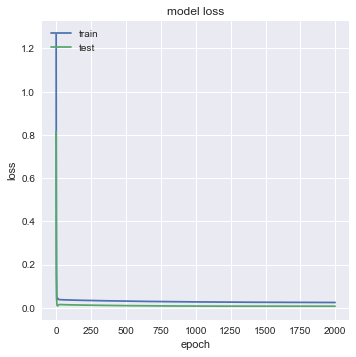

Test RMSE: 1665.956
R2_test: 0.161
Train RMSE: 3019.188
R2_train: 0.393
Test RMSE: 1665.956
R2_test: 0.996
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 5)              660       
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 886
Trainable params: 886
Non-trainable params: 0
_______________________________________

104/104 [==============================] - 0s 135us/step - loss: 0.0301 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 108/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0301 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0300 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0300 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0300 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0300 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0299 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 114/2000
104/10

104/104 [==============================] - 0s 145us/step - loss: 0.0281 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 222/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0281 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 223/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0281 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 224/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0280 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0280 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0280 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0280 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 228/2000
104/10

Epoch 279/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 280/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 281/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 282/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 283/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 284/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 285/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0275 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 135us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 394/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 395/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 396/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 397/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 398/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0268 - acc: 0.0096 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 400/2000
104/10

104/104 [==============================] - 0s 140us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 508/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 509/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 510/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 511/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 512/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 513/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 514/2000
104/10

Epoch 622/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 623/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 624/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 625/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 626/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 627/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 628/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 

Epoch 680/2000
104/104 [==============================] - 0s 121us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 681/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 682/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 683/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 684/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 685/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 686/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0258 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 135us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 795/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 796/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 797/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 798/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 799/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 800/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0255 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 801/2000
104/10

Epoch 909/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 910/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 911/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 912/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 913/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 914/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 915/2000
104/104 [==============================] - 0s 116us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 125us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1024/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1025/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1026/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1027/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1028/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1029/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1030/2000

Epoch 1080/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1081/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1082/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1083/2000
104/104 [==============================] - 0s 178us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1084/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1085/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1086/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0250 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 130us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1195/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1196/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1197/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1198/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1199/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1200/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 1201/2000

104/104 [==============================] - 0s 154us/step - loss: 0.0247 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1309/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0247 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1310/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0247 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1311/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0247 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1312/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0247 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1313/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0247 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1314/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0247 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1315/2000

Epoch 1365/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0246 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1366/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0246 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1367/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0246 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1368/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0246 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1369/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0246 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1370/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0246 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1371/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0246 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 135us/step - loss: 0.0245 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1423/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0245 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1424/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0245 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1425/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0245 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1426/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0245 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1427/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0245 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1428/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0245 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1429/2000

104/104 [==============================] - 0s 135us/step - loss: 0.0244 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1537/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0244 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1538/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0244 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1539/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0244 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1540/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0244 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1541/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0244 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1542/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0244 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1543/2000

104/104 [==============================] - 0s 149us/step - loss: 0.0243 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1651/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0243 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1652/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0243 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1653/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0243 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1654/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0243 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1655/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0243 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1656/2000
104/104 [==============================] - 0s 153us/step - loss: 0.0243 - acc: 0.0192 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 1657/2000

Epoch 1764/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1765/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1766/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1767/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1768/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1769/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1770/2000
104/104 [==============================] - 0s 224us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 125us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1822/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1823/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1824/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1825/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1826/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1827/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0242 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1828/2000

Epoch 1878/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1879/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1880/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1881/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1882/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1883/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1884/2000
104/104 [==============================] - 0s 116us/step - loss: 0.0241 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 135us/step - loss: 0.0240 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1993/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0240 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1994/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0240 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1995/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0240 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1996/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0240 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1997/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0240 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1998/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0240 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 1999/2000

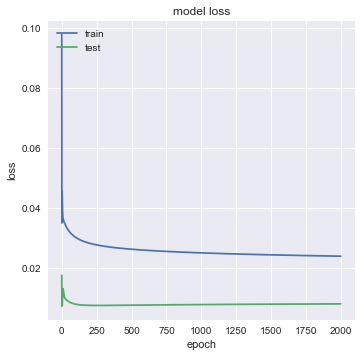

Test RMSE: 1729.778
R2_test: 0.096
Train RMSE: 2976.059
R2_train: 0.411
Test RMSE: 1729.777
R2_test: 0.996
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             15600     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 35,851
Trainable params: 35,851
Non-trainable params: 0
_________________________________

Epoch 108/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0253 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 114/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 

Epoch 223/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 224/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 228/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 229/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0238 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 

Epoch 281/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 282/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0234 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 283/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0233 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 284/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0233 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 285/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0233 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 286/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0233 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 287/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0233 - acc: 0.0192 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 154us/step - loss: 0.0227 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 396/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0227 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 397/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0227 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 398/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 400/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 401/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0226 - acc: 0.0192 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 402/2000
104/10

Epoch 510/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 511/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 512/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 513/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 514/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 515/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 516/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0221 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 

Epoch 568/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 569/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 570/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 571/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 572/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 573/2000
104/104 [==============================] - 0s 144us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 574/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0218 - acc: 0.0192 - val_loss: 0.0083 - val_acc: 0.0000e+00
Epoch 

Epoch 625/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0216 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 626/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0216 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 627/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0216 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 628/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0216 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 629/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0216 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 630/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0216 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 631/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0216 - acc: 0.0192 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 

Epoch 740/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 741/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 742/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 743/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 744/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 745/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 746/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0212 - acc: 0.0192 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 

Epoch 855/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 856/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 857/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 858/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 859/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 860/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 861/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0208 - acc: 0.0192 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 

Epoch 913/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 914/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 915/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 916/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 917/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 918/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 919/2000
104/104 [==============================] - 0s 178us/step - loss: 0.0206 - acc: 0.0192 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 146us/step - loss: 0.0203 - acc: 0.0192 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 1028/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0203 - acc: 0.0192 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 1029/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0203 - acc: 0.0192 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 1030/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0203 - acc: 0.0192 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 1031/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0203 - acc: 0.0192 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 1032/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0203 - acc: 0.0192 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 1033/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0203 - acc: 0.0192 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 1034/2000

104/104 [==============================] - 0s 154us/step - loss: 0.0200 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 1142/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0200 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 1143/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0200 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 1144/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0200 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 1145/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 1146/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 1147/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0199 - acc: 0.0192 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 1148/2000

104/104 [==============================] - 0s 164us/step - loss: 0.0197 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1256/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0197 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1257/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0197 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1258/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0197 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1259/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0197 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1260/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0197 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1261/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0197 - acc: 0.0192 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 1262/2000

104/104 [==============================] - 0s 145us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 1370/2000
104/104 [==============================] - 0s 169us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 1371/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 1372/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 1373/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 1374/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 1375/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0194 - acc: 0.0192 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 1376/2000

Epoch 1426/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0193 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 1427/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0193 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 1428/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0193 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 1429/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0193 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 1430/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0193 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 1431/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0193 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 1432/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0193 - acc: 0.0192 - val_loss: 0.0094 - val_acc: 0.0000e+00

104/104 [==============================] - 0s 159us/step - loss: 0.0192 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 1484/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0192 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 1485/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0192 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 1486/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0192 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 1487/2000
104/104 [==============================] - 0s 188us/step - loss: 0.0191 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 1488/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0191 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 1489/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0191 - acc: 0.0192 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 1490/2000

104/104 [==============================] - 0s 149us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 1598/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 1599/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 1600/2000
104/104 [==============================] - 0s 34us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 1601/2000
104/104 [==============================] - 0s 150us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 1602/2000
104/104 [==============================] - 0s 150us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 1603/2000
104/104 [==============================] - 0s 150us/step - loss: 0.0189 - acc: 0.0192 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 1604/2000


104/104 [==============================] - 0s 174us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1712/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1713/2000
104/104 [==============================] - 0s 178us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1714/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1715/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1716/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1717/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0187 - acc: 0.0192 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 1718/2000

104/104 [==============================] - 0s 145us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1826/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1827/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1828/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1829/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1830/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1831/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0185 - acc: 0.0192 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 1832/2000

104/104 [==============================] - 0s 149us/step - loss: 0.0183 - acc: 0.0192 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1939/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0183 - acc: 0.0192 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1940/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0183 - acc: 0.0192 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1941/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0183 - acc: 0.0192 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1942/2000
104/104 [==============================] - 0s 159us/step - loss: 0.0183 - acc: 0.0192 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1943/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0183 - acc: 0.0192 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1944/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0183 - acc: 0.0192 - val_loss: 0.0101 - val_acc: 0.0000e+00
Epoch 1945/2000

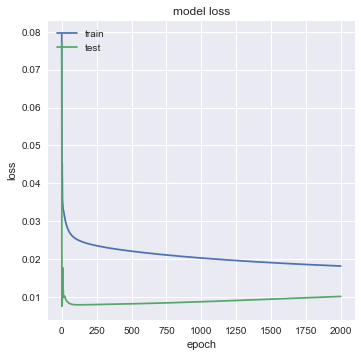

Test RMSE: 1941.299
R2_test: -0.138
Train RMSE: 2592.919
R2_train: 0.553
Test RMSE: 1941.299
R2_test: 0.995
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 100)            51200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 131,701
Trainable params: 131,701
Non-trainable params: 0
______________________________

104/104 [==============================] - 0s 202us/step - loss: 0.0349 - acc: 0.0096 - val_loss: 0.0128 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0349 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0349 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 270us/step - loss: 0.0349 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0348 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0348 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 114/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0348 - acc: 0.0096 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 115/2000
104/10

Epoch 166/2000
104/104 [==============================] - 0s 191us/step - loss: 0.0337 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 167/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 168/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 169/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 170/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0117 - val_acc: 0.0000e+00
Epoch 171/2000
104/104 [==============================] - 0s 289us/step - loss: 0.0336 - acc: 0.0096 - val_loss: 0.0117 - val_acc: 0.0000e+00
Epoch 172/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0335 - acc: 0.0096 - val_loss: 0.0117 - val_acc: 0.0000e+00
Epoch 

Epoch 224/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0326 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0326 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0326 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - ETA: 0s - loss: 0.0230 - acc: 0.020 - 0s 212us/step - loss: 0.0325 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 228/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0325 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 229/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0325 - acc: 0.0096 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 230/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0325 - acc: 0.0096 - val_los

Epoch 339/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0309 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 340/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0308 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 341/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0308 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 342/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0308 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 343/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0308 - acc: 0.0096 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 344/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0308 - acc: 0.0096 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 345/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0308 - acc: 0.0096 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 

Epoch 397/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0301 - acc: 0.0096 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 398/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0301 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0301 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 400/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0301 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 401/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0301 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 402/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0301 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 403/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0301 - acc: 0.0096 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 

Epoch 455/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0295 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 456/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0295 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 457/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0295 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 458/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0295 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 459/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0295 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 460/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 461/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0294 - acc: 0.0096 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 

Epoch 513/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0289 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 514/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0289 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 515/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0289 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 516/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0289 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 517/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0289 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 518/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0289 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 519/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0289 - acc: 0.0096 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 

Epoch 571/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0285 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 572/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0284 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 573/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0284 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 574/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0284 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 575/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0284 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 576/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0284 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 577/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0284 - acc: 0.0096 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 

Epoch 629/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0280 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 630/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0280 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 631/2000
104/104 [==============================] - 0s 227us/step - loss: 0.0280 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 632/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0280 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 633/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0280 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 634/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0280 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 635/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0280 - acc: 0.0096 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 

Epoch 687/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 688/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 689/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 690/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 691/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 692/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 693/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0276 - acc: 0.0096 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 

Epoch 745/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 746/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 747/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 748/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 749/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 750/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 751/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0273 - acc: 0.0096 - val_loss: 0.0081 - val_acc: 0.0000e+00
Epoch 

Epoch 803/2000
104/104 [==============================] - 0s 227us/step - loss: 0.0270 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 804/2000
104/104 [==============================] - 0s 260us/step - loss: 0.0270 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 805/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0270 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 806/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0270 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 807/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0270 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 808/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0270 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 809/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0270 - acc: 0.0096 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 

Epoch 918/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 919/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 920/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 921/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 922/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 923/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 924/2000
104/104 [==============================] - 0s 289us/step - loss: 0.0265 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 

Epoch 976/2000
104/104 [==============================] - 0s 188us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 977/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 978/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 979/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 980/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 981/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 982/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0263 - acc: 0.0096 - val_loss: 0.0079 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 212us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1091/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1092/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0260 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1093/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1094/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1095/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1096/2000
104/104 [==============================] - 0s 215us/step - loss: 0.0259 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1097/2000

104/104 [==============================] - 0s 227us/step - loss: 0.0257 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1205/2000
104/104 [==============================] - 0s 246us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1206/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1207/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1208/2000
104/104 [==============================] - 0s 217us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1209/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1210/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0256 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1211/2000

104/104 [==============================] - 0s 198us/step - loss: 0.0254 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1319/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0254 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1320/2000
104/104 [==============================] - 0s 231us/step - loss: 0.0254 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1321/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0254 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1322/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0254 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1323/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0254 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1324/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0254 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1325/2000

104/104 [==============================] - 0s 203us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1433/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1434/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1435/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0252 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1436/2000
104/104 [==============================] - 0s 241us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1437/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1438/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0251 - acc: 0.0096 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1439/2000

104/104 [==============================] - 0s 202us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1547/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1548/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1549/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1550/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1551/2000
104/104 [==============================] - 0s 276us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1552/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0249 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1553/2000

104/104 [==============================] - 0s 212us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1661/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1662/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1663/2000
104/104 [==============================] - 0s 236us/step - loss: 0.0248 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1664/2000
104/104 [==============================] - 0s 207us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1665/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1666/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0247 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1667/2000

104/104 [==============================] - 0s 202us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1775/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1776/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1777/2000
104/104 [==============================] - 0s 203us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1778/2000
104/104 [==============================] - 0s 222us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1779/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1780/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0246 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1781/2000

104/104 [==============================] - 0s 202us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1889/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1890/2000
104/104 [==============================] - 0s 202us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1891/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1892/2000
104/104 [==============================] - 0s 198us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1893/2000
104/104 [==============================] - 0s 212us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1894/2000
104/104 [==============================] - 0s 193us/step - loss: 0.0244 - acc: 0.0192 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 1895/2000

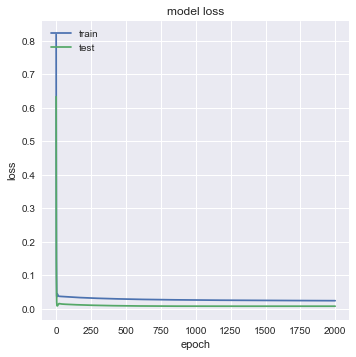

Test RMSE: 1698.167
R2_test: 0.128
Train RMSE: 2990.615
R2_train: 0.405
Test RMSE: 1698.166
R2_test: 0.996
(104, 1, 27) (104, 1) (27, 1, 27) (27, 1)
Shape of X Train 1 27
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 27)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 5)              660       
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 886
Trainable params: 886
Non-trainable params: 0
_______________________________________

Epoch 108/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 109/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 110/2000
104/104 [==============================] - 0s 121us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 111/2000
104/104 [==============================] - 0s 120us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 112/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 113/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0248 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 114/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0247 - acc: 0.0096 - val_loss: 0.0125 - val_acc: 0.0000e+00
Epoch 

Epoch 223/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0239 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 224/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0239 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 225/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0239 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 226/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0239 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 227/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0239 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 228/2000
104/104 [==============================] - 0s 121us/step - loss: 0.0239 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 229/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0239 - acc: 0.0096 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 125us/step - loss: 0.0235 - acc: 0.0096 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 338/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0235 - acc: 0.0096 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 339/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0235 - acc: 0.0096 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 340/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0235 - acc: 0.0096 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 341/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0235 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 342/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0235 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 343/2000
104/104 [==============================] - 0s 183us/step - loss: 0.0235 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 344/2000
104/10

Epoch 395/2000
104/104 [==============================] - 0s 174us/step - loss: 0.0233 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 396/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0233 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 397/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0233 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 398/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0233 - acc: 0.0096 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 399/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0233 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 400/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0233 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 401/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0233 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 

Epoch 453/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0232 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 454/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0232 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 455/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0232 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 456/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0232 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 457/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0232 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 458/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0232 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 459/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0232 - acc: 0.0096 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 140us/step - loss: 0.0230 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 568/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0230 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 569/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0230 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 570/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0230 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 571/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0230 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 572/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0230 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 573/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0230 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 574/2000
104/10

Epoch 625/2000
104/104 [==============================] - 0s 179us/step - loss: 0.0229 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 626/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0229 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 627/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0229 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 628/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0229 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 629/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0229 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 630/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0229 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 631/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0229 - acc: 0.0096 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 

Epoch 682/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0228 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 683/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0228 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 684/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0228 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 685/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0228 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 686/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0228 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 687/2000
104/104 [==============================] - 0s 136us/step - loss: 0.0228 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 688/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0228 - acc: 0.0096 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 178us/step - loss: 0.0227 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 797/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0227 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 798/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0227 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 799/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0227 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 800/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0227 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 801/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0227 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 802/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0227 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 803/2000
104/10

Epoch 854/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0226 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 855/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0226 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 856/2000
104/104 [==============================] - 0s 149us/step - loss: 0.0226 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 857/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0226 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 858/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0226 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 859/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0226 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 860/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0226 - acc: 0.0096 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 

104/104 [==============================] - 0s 125us/step - loss: 0.0225 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 969/2000
104/104 [==============================] - ETA: 0s - loss: 0.0134 - acc: 0.020 - 0s 125us/step - loss: 0.0225 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 970/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0225 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 971/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0225 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 972/2000
104/104 [==============================] - 0s 130us/step - loss: 0.0225 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 973/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0225 - acc: 0.0096 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 974/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0225 - acc: 0.0096 - val_loss: 0.0113 - val

104/104 [==============================] - 0s 125us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0112 - val_acc: 0.0000e+00
Epoch 1026/2000
104/104 [==============================] - ETA: 0s - loss: 0.0133 - acc: 0.020 - 0s 116us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0112 - val_acc: 0.0000e+00
Epoch 1027/2000
104/104 [==============================] - 0s 116us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0112 - val_acc: 0.0000e+00
Epoch 1028/2000
104/104 [==============================] - 0s 140us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0112 - val_acc: 0.0000e+00
Epoch 1029/2000
104/104 [==============================] - 0s 145us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0112 - val_acc: 0.0000e+00
Epoch 1030/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0112 - val_acc: 0.0000e+00
Epoch 1031/2000
104/104 [==============================] - 0s 164us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0112

Epoch 1082/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0112 - val_acc: 0.0000e+00
Epoch 1083/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0112 - val_acc: 0.0000e+00
Epoch 1084/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0112 - val_acc: 0.0000e+00
Epoch 1085/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0112 - val_acc: 0.0000e+00
Epoch 1086/2000
104/104 [==============================] - 0s 125us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0112 - val_acc: 0.0000e+00
Epoch 1087/2000
104/104 [==============================] - 0s 135us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0112 - val_acc: 0.0000e+00
Epoch 1088/2000
104/104 [==============================] - 0s 154us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0112 - val_acc: 0.0000e+00

KeyboardInterrupt: 

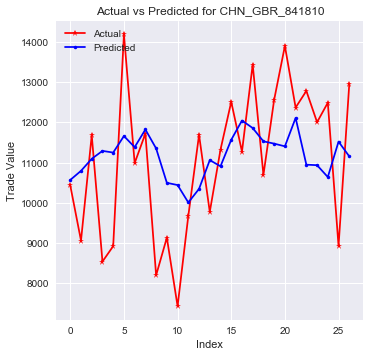

In [169]:

#repeats=10
e=2000
n=100
lr=0.05
b=50

neurons = [5, 50, 100]
results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for n in neurons:
            results_exp[str(n)] = experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("LSTM-Box Plot for {}-{}, {} epochs,{} neurons,{} learning_rate {}batch size"
          .format(y.name,MonthSeries,e,neurons,lr,b))
plt.savefig('Data/LSTM-Box Plot for {}-{}, {} epochs,{} neurons{},lr{}, b.png'
               .format(y.name,MonthSeries,e,neurons,lr,b))


In [ ]:
results = DataFrame()
repeats = 10
e=100
n=50
lr=0.05
b=50
results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for b in batch_sizes:
            results_exp[str(b)] = experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("LSTM-Box Plot for {}-{}, {} epochs,{} neurons,{} learning_rate {}batch size "
          .format(y.name,MonthSeries,e,n,lr,batch_sizes))
plt.savefig('Data/LSTM-Box Plot for {}-{}, {} epochs,{} neurons{}lr,{}bsize.png'
               .format(y.name,MonthSeries,e,n,lr,batch_sizes))

LSTM SONU

NN BASLANGICI

In [226]:
from sklearn.neural_network import MLPRegressor

In [291]:

def experiment_NN(repeats,param,alph,max_iteration,slv,rs,hidden_layer,train_X, test_X, train_y, test_y,scaler_x,scaler_y):

#    rs=90
    error_rmse = list()
    error_r2hat = list()
    error_r2 = list()
    for r in range(repeats):
        
        if param== 'TRUE':
            MLP = MLPRegressor(
                              alpha = alph,
                              solver=slv ,
                              max_iter=max_iteration,
       #                       random_state =rs,
                              hidden_layer_sizes=hidden_layer
                        )
        
        elif param== 'FALSE':
             MLP = MLPRegressor()
            
        
        MLPRegressor.fit(MLP,train_X,train_y)
        
        
        # make a prediction
        y_predict_test = MLP.predict(test_X)
        y_predict_train = MLP.predict(train_X)

  
        
        #test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#        test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))
        inv_x_test = scaler_x.inverse_transform(test_X)
        inv_x_test = pd.DataFrame(data=inv_x_test[:,:])


        # invert scaling for forecast
        inv_y_predict_test = scaler_y.inverse_transform(y_predict_test)
#        inv_y_predict_test = inv_y_predict_test[:,0]
        inv_y_predict_train = scaler_y.inverse_transform(y_predict_train)
#        inv_y_predict_train = inv_y_predict_train[:,0]

        # invert scaling for actual
        y_test = test_y.reshape((len(test_y), 1))
        inv_y_test = scaler_y.inverse_transform(test_y)
        inv_y_test = inv_y_test[:,0]

        y_train = train_y.reshape((len(train_y), 1))
        inv_y_train = scaler_y.inverse_transform(train_y)
        inv_y_train = inv_y_train[:,0]

        # calculate RMSE for DIFFERENCE
        rmse_test = sqrt(mean_squared_error(inv_y_test, inv_y_predict_test))
#        print('Test RMSE: %.3f' % rmse_test)
        R2_test=int(1000*(metrics.r2_score(inv_y_test, inv_y_predict_test)))/1000
#        print('R2_test: %.3f' % R2_test)

        rmse_train = sqrt(mean_squared_error(inv_y_train, inv_y_predict_train))
#        print('Train RMSE: %.3f' % rmse_train)
        R2_train=int(1000*(metrics.r2_score(inv_y_train, inv_y_predict_train)))/1000
#        print('R2_train: %.3f' % R2_train)

        # calculate RMSE for REAL VALUE

        real_y_test= inv_x_test.iloc[:,0]+inv_y_test
        real_y_predict_test=inv_x_test.iloc[:,0]+inv_y_predict_test
        
        real_rmse_test = sqrt(mean_squared_error(real_y_test, real_y_predict_test))
#        print('Test RMSE: %.3f' % real_rmse_test)
        real_R2_test=int(1000*(metrics.r2_score(real_y_test, real_y_predict_test)))/1000
#        print('R2_test: %.3f' % real_R2_test)
        
        error_rmse.append(real_rmse_test)
        error_r2hat.append(real_R2_test)
        error_r2.append(R2_test)
        
#        plt.gcf().clear()
#        plt.figure(figsize=(5.5, 5.5))
#        plt.plot(range(len(inv_y_test)), inv_y_test, linestyle='-', marker='*', color='r')
#        plt.plot(range(len(inv_y_predict_test)), inv_y_predict_test, linestyle='-', marker='.', color='b')
#        plt.legend(['Actual','Predicted'], loc=2)
#        plt.title('Actual vs Predicted for {}'.format(y.name))
#        plt.ylabel('Trade Value')
#        plt.xlabel('Index')
#        plt.savefig('Data/RF-LinePlt{} ,{} est,{} min_leaf,{} rs_for split,{} max_leaf, {} min_weight,{}min_impurity, {} R2.png'.format(y.name,
#                                est,min_leaf,random,feat,max_leaf,min_weight,min_impurity,R2_test), format='png', dpi=300)
       

        
        
    return error_rmse,error_r2,error_r2hat,train_y

Size: 600
           0.0001       1e-08       1e-10       1e-12
count  150.000000  150.000000  150.000000  150.000000
mean     0.286013    0.293387    0.277540    0.290007
std      0.354687    0.353444    0.402629    0.347401
min     -0.666000   -0.789000   -1.157000   -0.605000
25%      0.014000    0.083250    0.052000    0.063000
50%      0.313500    0.263000    0.304500    0.298500
75%      0.643750    0.658000    0.650250    0.648500
max      0.756000    0.756000    0.772000    0.768000


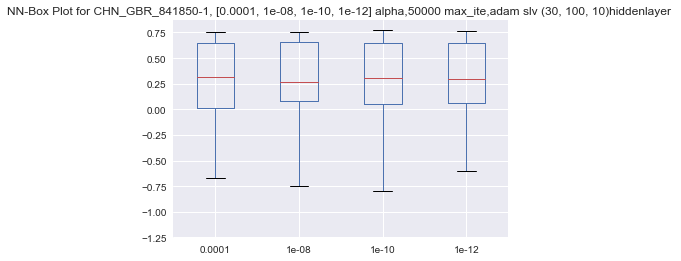

In [292]:
results = DataFrame()
results_exp = DataFrame()
param='TRUE'
random_split='TRUE'
alpha_options = [0.0001,0.00000001,0.0000000001, 0.000000000001]
solver_options = ['lbfgs', 'adam' ] # sgd solver cok sapıttı
max_iteration_options = [50000,60000,100000]
#random_state_options =[1,10,50,75,200]
#random_state_options =[10,50,90]
random_state_options =[90]
hidden_layer_sizes_options=[(30,100,10),(30,30),(100,100),(30,30,30)]

alph=alpha_options[0]
max_iteration=max_iteration_options[0]
slv=solver_options[1]
rseed=random_state_options[0]
hidden_layer=hidden_layer_sizes_options[0]


for r in range (0,50):
        rs=random.randint(1,100)
        rs=42
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for alph in alpha_options:
            rseed=90
            results_exp[str(alph)] = experiment_NN(repeats,param,alph,max_iteration,slv,rseed,hidden_layer,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
            

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer "
          .format(y.name,MonthSeries,alpha_options,max_iteration,slv,hidden_layer))
plt.savefig("Data/18Mayıs/NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer.png "
          .format(y.name,MonthSeries,alpha_options,max_iteration,slv,hidden_layer), format='png', dpi=300)


Size: 150
           50000      60000     100000
count  50.000000  50.000000  50.000000
mean    0.344680   0.329500   0.262920
std     0.286624   0.295176   0.349806
min    -0.463000  -0.400000  -0.617000
25%     0.193750   0.149750   0.070250
50%     0.377500   0.386500   0.297000
75%     0.615500   0.593000   0.616500
max     0.738000   0.744000   0.694000


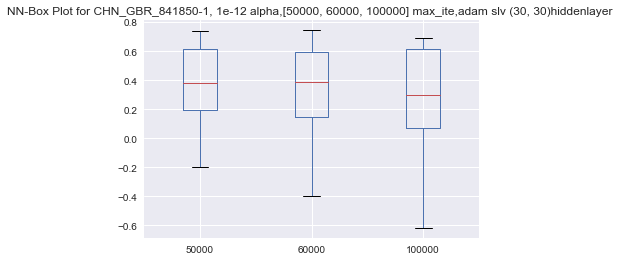

In [266]:
results = DataFrame()
results_exp = DataFrame()

alph=alpha_options[3]
max_iteration=max_iteration_options[0]
slv=solver_options[1]
rseed=random_state_options[0]
hidden_layer=hidden_layer_sizes_options[1]


for r in range (0,50):
        rs=random.randint(1,100)
        rs=42
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for max_iteration in max_iteration_options:
            
            results_exp[str(max_iteration)] = experiment_NN(repeats,param,alph,max_iteration,slv,rseed,hidden_layer,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
            

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer "
          .format(y.name,MonthSeries,alph,max_iteration_options,slv,hidden_layer))
plt.savefig("Data/18Mayıs/NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer.png "
          .format(y.name,MonthSeries,alph,max_iteration_options,slv,hidden_layer), format='png', dpi=300)


Size: 100
          lbfgs       adam
count  50.00000  50.000000
mean    0.39982   0.384600
std     0.13287   0.297788
min     0.13400  -0.483000
25%     0.30875   0.170250
50%     0.40750   0.451000
75%     0.51300   0.650500
max     0.65200   0.764000


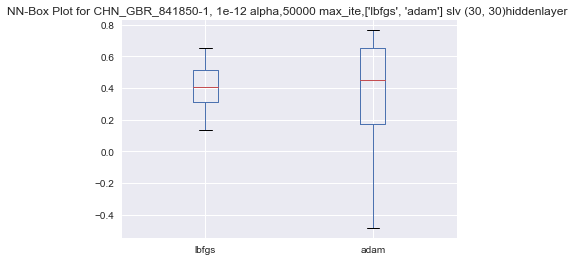

In [267]:
results = DataFrame()
results_exp = DataFrame()

alph=alpha_options[3]
max_iteration=max_iteration_options[0]
slv=solver_options[1]
rseed=random_state_options[0]
hidden_layer=hidden_layer_sizes_options[1]

for r in range (0,50):
        rs=random.randint(1,100)
        rs=42
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for slv in solver_options:
            
            results_exp[str(slv)] = experiment_NN(repeats,param,alph,max_iteration,slv,rseed,hidden_layer,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
            

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer "
          .format(y.name,MonthSeries,alph,max_iteration,solver_options,hidden_layer))
plt.savefig("Data/18Mayıs/NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer.png "
          .format(y.name,MonthSeries,alph,max_iteration,solver_options,hidden_layer), format='png', dpi=300)


alph= 1e-12
max_iteration= 50000
slv= adam
hidden_layer= (30, 30)
Size: 600
       (30, 100, 10)    (30, 30)  (100, 100)  (30, 30, 30)
count     150.000000  150.000000  150.000000    150.000000
mean        0.271927    0.324193   -0.010133      0.370420
std         0.399952    0.356652    0.442399      0.294274
min        -1.096000   -1.081000   -1.869000     -0.734000
25%         0.014000    0.126250   -0.284250      0.176500
50%         0.293500    0.396500   -0.083000      0.387500
75%         0.662000    0.642000    0.288750      0.653000
max         0.742000    0.752000    0.805000      0.772000


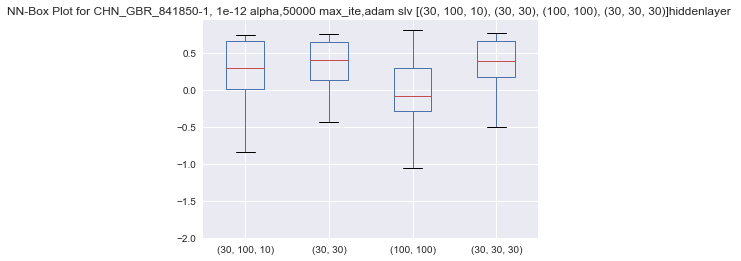

In [273]:

results = DataFrame()
results_exp = DataFrame()

alph=alpha_options[3]
max_iteration=max_iteration_options[0]
slv=solver_options[1]
rseed=random_state_options[0]
hidden_layer=hidden_layer_sizes_options[1]

print('alph=',alph)
print('max_iteration=',max_iteration)
print('slv=',slv)
print('hidden_layer=',hidden_layer)




for r in range (0,50):
        rs=random.randint(1,100)
        rs=42
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for hidden_layer in hidden_layer_sizes_options:
            
            results_exp[str(hidden_layer)] = experiment_NN(repeats,param,alph,max_iteration,slv,rseed,hidden_layer,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
            

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer "
          .format(y.name,MonthSeries,alph,max_iteration,slv,hidden_layer_sizes_options))
plt.savefig("Data/18Mayıs/NN-Box Plot for {}-{}, {} alpha,{} max_ite,{} slv {}hiddenlayer.png "
          .format(y.name,MonthSeries,alph,max_iteration,slv,hidden_layer_sizes_options), format='png', dpi=300)


NN DENEME VE KONTROL ICIN ESKI VERSIYONDAN GELEN KODLAR

In [288]:
def nn (alph,max_iteration,slv,rseed,hidden_layer,X_train, X_test, y_train, y_test):
    MLP = MLPRegressor(
                              alpha = alph,
                              solver=slv ,
                              max_iter=max_iteration,
                              random_state =rseed,
                              hidden_layer_sizes=hidden_layer
    )
    MLPRegressor.fit(MLP,X_train,y_train)
    
    predictions = MLP.predict(X_test)
    
    MAE=int(metrics.mean_absolute_error(y_test, predictions))
    MSE=int(sqrt(metrics.mean_squared_error(y_test, predictions)))
    R2=int(1000*(metrics.r2_score(y_test, predictions)))/1000
    print('R2 nn icindeki',R2)
    print(alph,max_iteration,slv,rseed,hidden_layer)
    return MAE,MSE,R2 

In [289]:
def calıstır_nn(Product,MonthSeries,Scaler_Type,X_train, X_test, y_train, y_test):
    estimation_method='nn'
    alpha_options = [0.0001,0.00000001]
    solver_options = [ 'adam']#,'lbfgs' ] # sgd solver cok sapıttı
    max_iteration_options = [50000]#,60000,100000]
    #random_state_options =[1,10,50,75,200]
    #random_state_options =[10,50,90]
    random_state_options =[90]
    hidden_layer_sizes_options=[(30,100,10)]#,(30,30),(100,100),(30,30,30)]

    sonuc = pd.DataFrame(columns='EstMethod Product Scaler MonthSeries alpha max_iteration slv hidden_layer random MAE MSE R2'.split())
    i=0

    for alpha in alpha_options:
    
        for max_iteration in max_iteration_options:

            for slv in solver_options:
        
                for hidden_layer in hidden_layer_sizes_options:
           
                    for rseed in random_state_options:
                
                        estimate_metric=nn(alpha,max_iteration,slv,rseed,hidden_layer,X_train, X_test, y_train, y_test)
                    
                        MAE=estimate_metric[0]
                        MSE=estimate_metric[1]
                        R2=estimate_metric[2]
                        print(R2)
                        print('alpha',alpha,'iter:',max_iteration,'slvr:',slv,'random:',rseed,'layers:',hidden_layer,
                          MAE,MSE,R2)
                        sonuc.loc[i]=[estimation_method,Product,Scaler_Type,MonthSeries,alpha,max_iteration,slv,hidden_layer,random,MAE,MSE,R2]
                        i=i+1
    return sonuc 

In [290]:

y=y3
Z=z3
X=X3

values = X.values
values = values.astype('float32')
scaler_x= MinMaxScaler(feature_range=(0, 1))

scaled_value_x = scaler_x.fit_transform(values)
scaled_value_x = pd.DataFrame(data=scaled_value_x[:,:])

values = y.values
values = values.astype('float32')
scaler_y= MinMaxScaler(feature_range=(0, 1))

scaled_value_y = scaler_y.fit_transform(values)
scaled_value_y = pd.DataFrame(data=scaled_value_y)

X_train, X_test, y_train, y_test = train_test_split(scaled_value_x,scaled_value_y,test_size=0.2,random_state=42,stratify=Z['Month'])


random_split='TRUE'
rs=42
SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
X_train=SplitData[0] 
X_test=SplitData[1] 
y_train=SplitData[2] 
y_test=SplitData[3]
scaler_x=SplitData[4]
scaler_y=SplitData[5]
split_succesfull=SplitData[7]




sonuc=calıstır_nn(Product,MonthSeries,ScalerType,X_train, X_test, y_train, y_test)
filename='Out_NN_Prediction_Results_{one}_Product{two}'.format(one=datetime.now().strftime('Date_%m-%d_Time%H_%M'),two=Product)

#sonuc.to_excel('{}.xlsx'.format(filename),index = False)

R2 nn icindeki 0.729
0.0001 50000 adam 90 (30, 100, 10)
0.729
alpha 0.0001 iter: 50000 slvr: adam random: 90 layers: (30, 100, 10) 0 0 0.729
R2 nn icindeki 0.731
1e-08 50000 adam 90 (30, 100, 10)
0.731
alpha 1e-08 iter: 50000 slvr: adam random: 90 layers: (30, 100, 10) 0 0 0.731


NN SONU

In [ ]:
from pyDOE import *

In [ ]:

#fig, axs = plt.subplots(2, 3)


results.boxplot()
plt.title("Boxplot of Something")

#set_title('change outlier\npoint symbols')


plt.savefig('boxplot_epochs.png')


In [ ]:
type(results)

In [ ]:
type(data)

#### Aşağıdaki Orjinal Kod Parçası

In [ ]:


    print(train_X.shape[1])
    print(train_X.shape[2])

    model = Sequential()
    model.add(LSTM(300, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(300))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

sgd = optimizers.SGD(lr=0.15, clipvalue=0.3)
model.compile(loss='mean_squared_error', optimizer='adam')
#model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

# fit network
history = model.fit(train_X, train_y, epochs=800, batch_size=12, validation_data=(test_X, test_y), verbose=0, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


#test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))

test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))
inv_x_test = scaler_x.inverse_transform(test_X_reshaped)
inv_x_test = pd.DataFrame(data=inv_x_test[:,:])

# make a prediction
y_predict_test = model.predict(test_X)
y_predict_train = model.predict(train_X)

# invert scaling for forecast
inv_y_predict_test = scaler_y.inverse_transform(y_predict_test)
inv_y_predict_test = inv_y_predict_test[:,0]
inv_y_predict_train = scaler_y.inverse_transform(y_predict_train)
inv_y_predict_train = inv_y_predict_train[:,0]

# invert scaling for actual
y_test = test_y.reshape((len(test_y), 1))
inv_y_test = scaler_y.inverse_transform(test_y)
inv_y_test = inv_y_test[:,0]

y_train = train_y.reshape((len(train_y), 1))
inv_y_train = scaler_y.inverse_transform(train_y)
inv_y_train = inv_y_train[:,0]

# calculate RMSE for DIFFERENCE
rmse_test = sqrt(mean_squared_error(inv_y_test, inv_y_predict_test))
print('Test RMSE: %.3f' % rmse_test)
R2_test=int(1000*(metrics.r2_score(inv_y_test, inv_y_predict_test)))/1000
print('R2_test: %.3f' % R2_test)

rmse_train = sqrt(mean_squared_error(inv_y_train, inv_y_predict_train))
print('Train RMSE: %.3f' % rmse_train)
R2_train=int(1000*(metrics.r2_score(inv_y_train, inv_y_predict_train)))/1000
print('R2_train: %.3f' % R2_train)

# calculate RMSE for REAL VALUE

real_y_test= inv_x_test.iloc[:,0]+inv_y_test
real_y_predict_test=inv_x_test.iloc[:,0]+inv_y_predict_test

rmse_test = sqrt(mean_squared_error(real_y_test, real_y_predict_test))
print('Test RMSE: %.3f' % rmse_test)
R2_test=int(1000*(metrics.r2_score(real_y_test, real_y_predict_test)))/1000
print('R2_test: %.3f' % R2_test)



In [ ]:
a=pd.DataFrame(columns=['inv_y_test'],data=inv_y_test)
b=pd.DataFrame(columns=['inv_y_predict_test'],data=inv_y_predict_test)
c=pd.concat([a, b], axis=1)

sns.pairplot(c[['inv_y_test','inv_y_predict_test']])

In [ ]:
type(inv_y_test)

In [ ]:
a=pd.DataFrame(columns=['inv_y_train'],data=inv_y_train)
b=pd.DataFrame(columns=['inv_y_predict_train'],data=inv_y_predict_train)

c=pd.concat([a, b], axis=1)

sns.pairplot(c[['inv_y_train','inv_y_predict_train']])

In [ ]:
inv_y_predict_test.shape

In [ ]:
inv_y_train.shape

In [ ]:
inv_y_predict_train.shape